### Classification of exploration well logs based on geological data

Brief introduction:

In the activity of exploration of new oil fields, within the life cycle of a project development of new wells, in its initial stage, several crucial activities are required, among them the exploration of the geographical terrain that includes evaluating the characteristics of the geological layers based on its properties and geological formation structure, all this in order to carry out a geological characterization. Due to the prerequisite, small geological samples are extracted from holes that are drilled into the ground at different depths.

With the support of Computational Intelligence Techniques (CIT), the possibilities have been extended to undertake well characterizations more frequently and accurately, making the process of studying these properties more expeditious since it is a task that is expensive to carry out in a traditional way. 

In this project were used two datasets of 24,290 and 12,255 rows respectively, totaling 36,545 records between the two exploratory wells at different depths.

The main objective of this project is to analyze well logs and classify them into one of the two existing categories.

# Initialization

In [1408]:
# Loading all libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report


from importlib import reload
plt=reload(plt)

## Loading data 

In [1409]:
# Carga del archivo de datos

df_well_1 = pd.read_csv('well_log_1.csv')
df_well_1.head(5)

,ID,DEPTH,BIT,M1R1,DT,PHIE,CAL,NPHI,M1R2,VCL,...,GAS,LUTITA,ARENISCA,MUDSTONE,MARGA,YMBRITT,PRBRITT,BRITT,ID.1,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,-999.25,2.3390,0.7043,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1869.0,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,-999.25,2.3276,0.7086,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,-999.25,2.3492,0.7029,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,-999.25,2.3772,0.6956,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,-999.25,2.3826,0.6953,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


In [1410]:
df_well_2 = pd.read_csv('well_log_2.csv')
df_well_2.head(5)

,ID,DEPTH,AO10,AO20,AO30,AO60,AO90,BS,CALI,NPHI,...,ZZZZ,AAAAA,BBBBB,CCCCC,DDDDD,EEEEE,FFFFF,GGGGG,ID.1,indice
0,1891,109.0856,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1891.0,0
1,1891,109.2380,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1891,109.3904,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1891,109.5428,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1891,109.6952,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


 ## Paso-2 Preparación de los datos

## Exploración inicial de los datasets

In [1411]:
df_well_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24290 entries, 0 to 24289
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          24290 non-null  int64  
 1   DEPTH       24290 non-null  float64
 2   BIT         24290 non-null  float64
 3   M1R1        24290 non-null  float64
 4   DT          24290 non-null  float64
 5   PHIE        24290 non-null  float64
 6   CAL         24290 non-null  float64
 7   NPHI        24290 non-null  float64
 8   M1R2        24290 non-null  float64
 9   VCL         24290 non-null  float64
 10  PHID        24290 non-null  float64
 11  RHOB        24290 non-null  float64
 12  SW          24290 non-null  float64
 13  GR          24290 non-null  float64
 14  M1R3        24290 non-null  float64
 15  M1R6        24290 non-null  float64
 16  M1R9        24290 non-null  float64
 17  M1RX        24290 non-null  float64
 18  BVW         24290 non-null  float64
 19  K_CORTE_@_  24290 non-nul

In [1412]:
df_well_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12255 entries, 0 to 12254
Columns: 113 entries, ID to indice
dtypes: float64(110), int64(3)
memory usage: 10.6 MB


In [1413]:
df_well_1.columns

Index(['ID', 'DEPTH', 'BIT', 'M1R1', 'DT', 'PHIE', 'CAL', 'NPHI', 'M1R2',
       'VCL', 'PHID', 'RHOB', 'SW', 'GR', 'M1R3', 'M1R6', 'M1R9', 'M1RX',
       'BVW', 'K_CORTE_@_', 'KTIX', 'TVD', 'PAYFLAG', 'GRN', 'VEL.PERF.',
       'GAS', 'LUTITA', 'ARENISCA', 'MUDSTONE', 'MARGA', 'YMBRITT', 'PRBRITT',
       'BRITT', 'ID.1', 'indice'],
      dtype='object')

In [1414]:
df_well_2.columns

Index(['ID', 'DEPTH', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90', 'BS', 'CALI',
       'NPHI',
       ...
       'ZZZZ', 'AAAAA', 'BBBBB', 'CCCCC', 'DDDDD', 'EEEEE', 'FFFFF', 'GGGGG',
       'ID.1', 'indice'],
      dtype='object', length=113)

In [1415]:
df_well_1.shape

(24290, 35)

In [1416]:
df_well_2.shape

(12255, 113)

In [1417]:
df_well_1.head(5)

,ID,DEPTH,BIT,M1R1,DT,PHIE,CAL,NPHI,M1R2,VCL,...,GAS,LUTITA,ARENISCA,MUDSTONE,MARGA,YMBRITT,PRBRITT,BRITT,ID.1,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,-999.25,2.3390,0.7043,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1869.0,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,-999.25,2.3276,0.7086,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,-999.25,2.3492,0.7029,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,-999.25,2.3772,0.6956,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,-999.25,2.3826,0.6953,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


In [1418]:
df_well_2.head(5)

,ID,DEPTH,AO10,AO20,AO30,AO60,AO90,BS,CALI,NPHI,...,ZZZZ,AAAAA,BBBBB,CCCCC,DDDDD,EEEEE,FFFFF,GGGGG,ID.1,indice
0,1891,109.0856,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1891.0,0
1,1891,109.2380,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1891,109.3904,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1891,109.5428,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1891,109.6952,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


In [1419]:
df_well_1.describe()

,ID,DEPTH,BIT,M1R1,DT,PHIE,CAL,NPHI,M1R2,VCL,...,GAS,LUTITA,ARENISCA,MUDSTONE,MARGA,YMBRITT,PRBRITT,BRITT,ID.1,indice
count,24290.0,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,...,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,1.0,24290.000000
mean,1869.0,1198.410900,-164.713154,-5.188658,69.801505,-24.255817,-165.746345,-219.097000,-5.614187,-9.380791,...,-165.444010,-164.228818,-182.028736,-208.166859,-208.519679,-232.796818,-220.911458,-226.854138,1869.0,12144.500000
std,0.0,534.319228,378.283241,100.826726,157.723600,153.837709,379.079450,413.699842,100.560034,99.921354,...,431.146906,432.395864,423.137401,408.852529,408.616730,442.616917,449.563137,446.086966,NaN,7012.063355
min,1869.0,273.000000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1869.0,0.000000
25%,1869.0,735.705450,6.750000,2.194350,78.078200,0.000200,6.564000,0.162000,2.219000,0.644000,...,14.461500,0.000000,0.000000,0.000000,0.000000,-5.632650,-6.455875,-6.043375,1869.0,6072.250000
50%,1869.0,1198.410900,6.750000,2.788400,91.762200,0.002600,6.610700,0.242100,2.756050,0.759200,...,60.230800,46.153800,10.769200,0.000000,0.000000,11.441750,26.379650,18.915900,1869.0,12144.500000
75%,1869.0,1661.116350,6.750000,4.582150,106.271275,0.019875,6.640200,0.311800,4.360850,0.834600,...,71.846200,81.538500,50.769200,0.000000,0.000000,29.578875,48.840900,39.197375,1869.0,18216.750000
max,1869.0,2123.821800,6.750000,455.349900,139.161400,0.132600,12.364500,0.433700,205.147400,1.000000,...,89.000000,100.000000,100.000000,100.000000,90.000000,130.190500,120.872500,125.531500,1869.0,24289.000000


In [1420]:
df_well_2.describe()

,ID,DEPTH,AO10,AO20,AO30,AO60,AO90,BS,CALI,NPHI,...,ZZZZ,AAAAA,BBBBB,CCCCC,DDDDD,EEEEE,FFFFF,GGGGG,ID.1,indice
count,12255.0,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,...,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,1.0,12255.000000
mean,1891.0,1042.840400,-210.540940,-210.898680,3.181794,-211.054626,3.095323,-205.959466,4.715158,-215.547824,...,-995.261030,-995.754622,-995.354512,-995.352986,-995.353012,-995.923195,-995.399456,-991.088064,1891.0,6127.000000
std,0.0,539.169576,413.962683,413.749196,44.908413,413.519610,44.191372,412.484516,69.854869,411.267699,...,70.012984,61.084946,68.149436,68.322784,68.322330,58.138237,67.555826,93.341138,NaN,3537.858109
min,1891.0,109.085600,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1891.0,0.000000
25%,1891.0,575.963000,1.932000,1.918550,2.185300,2.042250,2.515250,8.500000,8.549450,0.122800,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1891.0,3063.500000
50%,1891.0,1042.840400,2.921600,2.832400,2.868300,2.972800,3.100300,8.500000,8.689100,0.230500,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1891.0,6127.000000
75%,1891.0,1509.717800,4.783800,4.711150,4.712650,4.760700,4.699800,8.500000,9.049000,0.299900,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1891.0,9190.500000
max,1891.0,1976.595200,561.925700,983.671000,380.834500,200.189200,169.243100,12.250000,18.575600,0.458800,...,357.775700,81.688700,216.601900,303.773500,303.765200,20.000000,348.184200,82.398900,1891.0,12254.000000


## Limpieza_y_Preparación_de_los_datos

### Verificación_y_corrección_de_los_tipos_de_datos

In [1421]:
# Convirtiendo la feature date al tipo de dato más adecuado

#df_well_1 #['date'] = pd.to_datetime(df_marketing_orders['date'])

In [1422]:
df_well_1.columns = map(str.lower, df_well_1.columns)
df_well_1.head(5)

,id,depth,bit,m1r1,dt,phie,cal,nphi,m1r2,vcl,...,gas,lutita,arenisca,mudstone,marga,ymbritt,prbritt,britt,id.1,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,-999.25,2.3390,0.7043,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1869.0,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,-999.25,2.3276,0.7086,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,-999.25,2.3492,0.7029,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,-999.25,2.3772,0.6956,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,-999.25,2.3826,0.6953,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


In [1423]:
df_well_2.columns = map(str.lower, df_well_2.columns)
df_well_2.head(5)

,id,depth,ao10,ao20,ao30,ao60,ao90,bs,cali,nphi,...,zzzz,aaaaa,bbbbb,ccccc,ddddd,eeeee,fffff,ggggg,id.1,indice
0,1891,109.0856,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1891.0,0
1,1891,109.2380,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1891,109.3904,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1891,109.5428,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1891,109.6952,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


### Revisión de la existencia de valores duplicados 

In [1424]:
df_well_1.duplicated().sum()

0

In [1425]:
df_well_2.duplicated().sum()

0

### Revisión de la existencia de valores faltantes Fase 1

In [1426]:
df_well_1.isna().sum()

id                0
depth             0
bit               0
m1r1              0
dt                0
phie              0
cal               0
nphi              0
m1r2              0
vcl               0
phid              0
rhob              0
sw                0
gr                0
m1r3              0
m1r6              0
m1r9              0
m1rx              0
bvw               0
k_corte_@_        0
ktix              0
tvd               0
payflag           0
grn               0
vel.perf.         0
gas               0
lutita            0
arenisca          0
mudstone          0
marga             0
ymbritt           0
prbritt           0
britt             0
id.1          24289
indice            0
dtype: int64

In [1427]:
df_well_2.isna().sum()

id            0
depth         0
ao10          0
ao20          0
ao30          0
          ...  
eeeee         0
fffff         0
ggggg         0
id.1      12254
indice        0
Length: 113, dtype: int64

Al revisar los datos faltantes de manera tradicional no se encontraron valores, no obstante al buscar en la literatura, se denota que aquellas celdas con valores -999.25, denotan valores faltantes, en la misma, por lo que se realiza una segunda revisión adicionando la nueva precisión.

Se adoptó el criterio que aquellas con columnas con má del 20 % de datos faltantes son removidas.

### Revisión nuevamente de los datos faltantes identificados con -999.25 en una Segunda Fase

In [1428]:
#mis_booleans = (df['Age'].isna())&(df['Survived']==1 )
#df_new = df[mis_booleans].groupby(['Embarked', 'Sex'])['Sex'].count()

# primero de detectan los valores negativos en cada columna 

#mis_booleans = (df_well_1['arenisca'] == -999)
#df_new = df_well_1[mis_booleans].count()
#df_new
#df.eq(-999).any().sum()
#df_well_1.eq(-999).any().sum()


In [1429]:
# Get the unique values of 'B' column
df_well_1.nphi.unique()

array([-9.9925e+02,  3.0460e-01,  3.1140e-01, ...,  1.4420e-01,
        1.4570e-01,  1.6410e-01])

In [1430]:
#df.isin(['?']).sum(axis=0)

#df_well_1.isin(['-999']).sum(axis=0)
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'nphi', 'm1r2',
       'vcl', 'phid', 'rhob', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx',
       'bvw', 'k_corte_@_', 'ktix', 'tvd', 'payflag', 'grn', 'vel.perf.',
       'gas', 'lutita', 'arenisca', 'mudstone', 'marga', 'ymbritt', 'prbritt',
       'britt', 'id.1', 'indice'],
      dtype='object')

In [1431]:
df_well_1.rename(columns={'k_corte_@_':'k_corte'}, inplace=True)

In [1432]:
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'nphi', 'm1r2',
       'vcl', 'phid', 'rhob', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx',
       'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'grn', 'vel.perf.', 'gas',
       'lutita', 'arenisca', 'mudstone', 'marga', 'ymbritt', 'prbritt',
       'britt', 'id.1', 'indice'],
      dtype='object')

In [1433]:
df_well_2.columns

Index(['id', 'depth', 'ao10', 'ao20', 'ao30', 'ao60', 'ao90', 'bs', 'cali',
       'nphi',
       ...
       'zzzz', 'aaaaa', 'bbbbb', 'ccccc', 'ddddd', 'eeeee', 'fffff', 'ggggg',
       'id.1', 'indice'],
      dtype='object', length=113)

In [1434]:
#df_well_2['k_corte_@_']
df_well_2.rename(columns={'k_corte_@_':'k_corte'}, inplace=True)

In [1435]:
df_well_1= df_well_1.drop(['id.1'], axis=1)

In [1436]:
df_well_2= df_well_2.drop(['id.1'], axis=1)

In [1437]:
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'nphi', 'm1r2',
       'vcl', 'phid', 'rhob', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx',
       'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'grn', 'vel.perf.', 'gas',
       'lutita', 'arenisca', 'mudstone', 'marga', 'ymbritt', 'prbritt',
       'britt', 'indice'],
      dtype='object')

Al revisar la literatura se detecta que las columnas bajo el nombre de  'zzzz', 'aaaaa', 'bbbbb', 'ccccc', 'ddddd', 'eeeee', 'fffff', y así sucesivamente no aportan valor y son producto de errores en las mediciones, luego son eliminadas en tabla 2. 

In [1438]:
df_well_2= df_well_2.drop(['zzzz', 'aaaaa', 'bbbbb', 'ccccc', 'ddddd', 'eeeee', 'fffff', 'ggggg'], axis=1)

In [1439]:
df_well_2.columns

Index(['id', 'depth', 'ao10', 'ao20', 'ao30', 'ao60', 'ao90', 'bs', 'cali',
       'nphi',
       ...
       'hazi_3', 'p1az_3', 'p1no_2', 'quaf_3', 'rb_2', 'dpap_3', 'wwww',
       'xxxx', 'yyyy', 'indice'],
      dtype='object', length=104)

In [1440]:
df_well_2= df_well_2.drop(['wwww','xxxx', 'yyyy'], axis=1)

In [1441]:
df_well_2.columns

Index(['id', 'depth', 'ao10', 'ao20', 'ao30', 'ao60', 'ao90', 'bs', 'cali',
       'nphi',
       ...
       'dpap_2', 'dpaz_3', 'dptr_3', 'hazi_3', 'p1az_3', 'p1no_2', 'quaf_3',
       'rb_2', 'dpap_3', 'indice'],
      dtype='object', length=101)

In [1442]:
df_well_1.shape[0]

24290

In [1443]:
(df_well_1[df_well_1 == -999.25].count())/df_well_1.shape[0] *100

id            0.000000
depth         0.000000
bit          17.044051
m1r1          1.008646
dt            2.107863
phie          2.428983
cal          17.138740
nphi         21.947303
m1r2          1.008646
vcl           1.008646
phid          0.000000
rhob         21.836147
sw            2.428983
gr            2.260189
m1r3          1.008646
m1r6          1.008646
m1r9          1.008646
m1rx          1.008646
bvw           2.428983
k_corte       0.000000
ktix          0.000000
tvd           0.000000
payflag       0.000000
grn           1.379168
vel.perf.    21.062166
gas          21.062166
lutita       21.062166
arenisca     21.062166
mudstone     21.062166
marga        21.062166
ymbritt      24.985591
prbritt      24.985591
britt        24.985591
indice        0.000000
dtype: float64

<Axes: title={'center': 'Faltantes en Tabla 1'}, xlabel='Nombre de la columna', ylabel='Datos faltantes'>

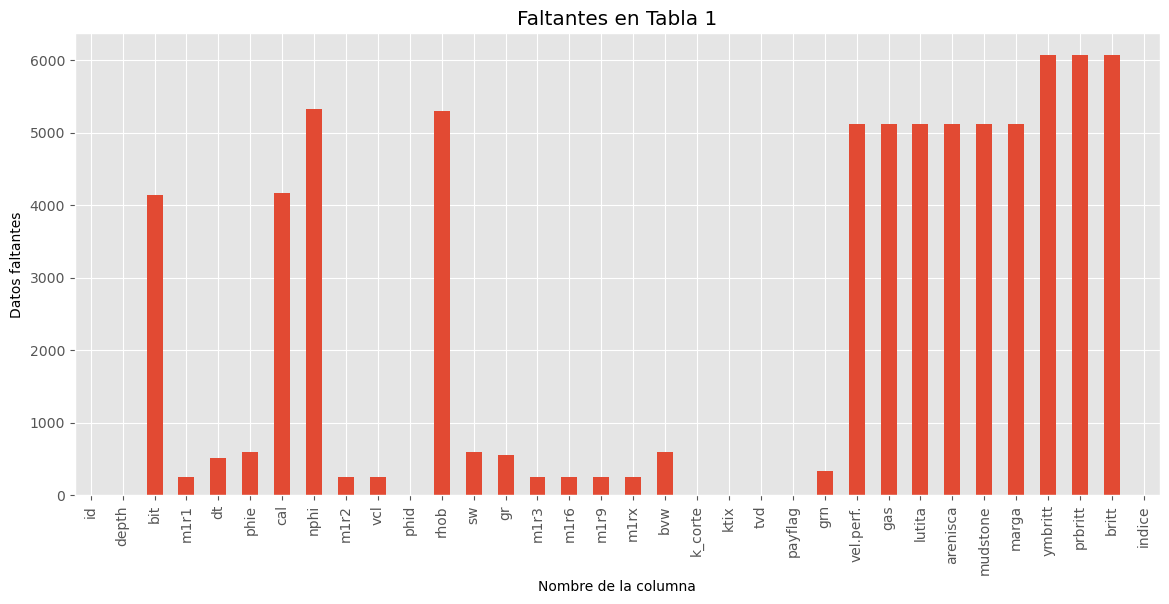

In [1444]:
#df_well_1.groupby(-999.2500).count()
#index, counts = np.unique(df_well_1.values,return_counts=True)
df_well_1[df_well_1 == -999.25].count().plot(kind='bar', rot= 90, title='Faltantes en Tabla 1', ylabel='Datos faltantes' , xlabel='Nombre de la columna', figsize=(14, 6))
#.plot(kind='bar', rot= 0, title='Faltantes', ylabel='Total', xlabel='Tipos de establecimientos', figsize=(14, 6))

Conclusión parcial:

Como se puede apreciar existen 11 columnas con datos faltantes por encima del 20 %, por lo que son removidas en la tabla 1

In [1445]:
collist = df_well_1.columns
collist 

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'nphi', 'm1r2',
       'vcl', 'phid', 'rhob', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx',
       'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'grn', 'vel.perf.', 'gas',
       'lutita', 'arenisca', 'mudstone', 'marga', 'ymbritt', 'prbritt',
       'britt', 'indice'],
      dtype='object')

In [1446]:
collistadjusted = pd.DataFrame()
#collistadjusted = (df_well_1[df_well_1 == -999.25].count())/df_well_1.shape[0] *100
collistadjusted = df_well_1[df_well_1 == -999.25].count().reset_index()
collistadjusted

,index,0
0,id,0
1,depth,0
2,bit,4140
3,m1r1,245
4,dt,512
5,phie,590
6,cal,4163
7,nphi,5331
8,m1r2,245
9,vcl,245


In [1447]:
#collistadjusted['remaining_rows']
#collistadjusted.rename(columns={'0':'remaining_rows'})
collistadjusted.rename(columns={0:'remaining_rows'}, inplace=True)
collistadjusted

,index,remaining_rows
0,id,0
1,depth,0
2,bit,4140
3,m1r1,245
4,dt,512
5,phie,590
6,cal,4163
7,nphi,5331
8,m1r2,245
9,vcl,245


In [1448]:
collistadjusted['amount_remaining'] = collistadjusted['remaining_rows'] /df_well_1.shape[0] *100
collistadjusted['amount_remaining']

0      0.000000
1      0.000000
2     17.044051
3      1.008646
4      2.107863
5      2.428983
6     17.138740
7     21.947303
8      1.008646
9      1.008646
10     0.000000
11    21.836147
12     2.428983
13     2.260189
14     1.008646
15     1.008646
16     1.008646
17     1.008646
18     2.428983
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     1.379168
24    21.062166
25    21.062166
26    21.062166
27    21.062166
28    21.062166
29    21.062166
30    24.985591
31    24.985591
32    24.985591
33     0.000000
Name: amount_remaining, dtype: float64

Conclusión parcial:

Como se puede apreciar existen 11 columnas con datos faltantes por encima del 20 %, por lo que son removidas en la tabla 1

In [1449]:
#collistadjusted['amount_remaining']
#df_well_2= df_well_2.drop(['wwww','xxxx', 'yyyy'], axis=1)

#collistadjusted.drop(axis=1, thresh = int(0.2*df.shape[0]), inplace=True)
#df = df.loc[:, df.isnull().mean() < .8]

#df_new = collistadjusted.loc[:, collistadjusted['amount_remaining'] < .20]

#max_number_of_nas = 3000
#df_new = collistadjusted.loc[:, (collistadjusted['amount_remaining'] < 0.20)]

#collistadjusted.drop(collistadjusted.columns[collistadjusted.apply(lambda col: collistadjusted[col] > 3)], axis=1)
#collistadjusted

In [1450]:
#df[df['Species'] != 'Cat']

df_new = collistadjusted[collistadjusted['amount_remaining'] > 20]
df_new

,index,remaining_rows,amount_remaining
7,nphi,5331,21.947303
11,rhob,5304,21.836147
24,vel.perf.,5116,21.062166
25,gas,5116,21.062166
26,lutita,5116,21.062166
27,arenisca,5116,21.062166
28,mudstone,5116,21.062166
29,marga,5116,21.062166
30,ymbritt,6069,24.985591
31,prbritt,6069,24.985591


In [1451]:
listica = df_new['index']
listicaa =list(listica) 
listicaa

['nphi',
 'rhob',
 'vel.perf.',
 'gas',
 'lutita',
 'arenisca',
 'mudstone',
 'marga',
 'ymbritt',
 'prbritt',
 'britt']

In [1452]:
# Antes de remover las columnas con más del 20 % de faltantes 

#df_well_1.columns

In [1453]:
df_well_1= df_well_1.drop(['nphi',
 'rhob',
 'vel.perf.',
 'gas',
 'lutita',
 'arenisca',
 'mudstone',
 'marga',
 'ymbritt',
 'prbritt',
 'britt'], axis=1)

In [1454]:
# Después  de remover las columnas con más del 20 % de faltantes 

df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'payflag', 'grn', 'indice'],
      dtype='object')

<Axes: title={'center': 'Faltantes en Tabla 1'}, xlabel='Nombre de la columna', ylabel='Datos faltantes'>

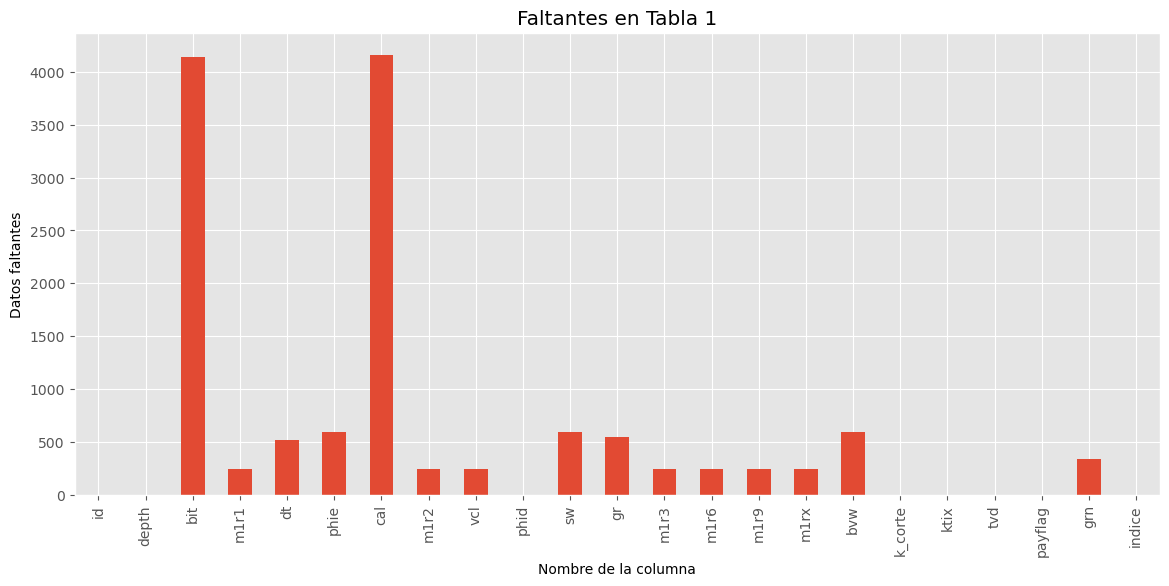

In [1455]:
df_well_1[df_well_1 == -999.25].count().plot(kind='bar', rot= 90, title='Faltantes en Tabla 1', ylabel='Datos faltantes' , xlabel='Nombre de la columna', figsize=(14, 6))

In [1456]:
df_well_1.shape

(24290, 23)

Hasta aquí se han removido 12 columnas con más del 20 % de filas con valor -999.25 en la tabla 1 que es indicativo de ausencia de datos para poder aplicar los algoritmos de clasificación. 

### Realizando la misma operación anterior ahora en la Tabla 2 

In [1457]:
collistadjusted2.rename(columns={0:'remaining_rows'}, inplace=True)
#collistadjusted2

<Axes: title={'center': 'Faltantes en Tabla 2'}, xlabel='Nombre de la columna', ylabel='Datos faltantes'>

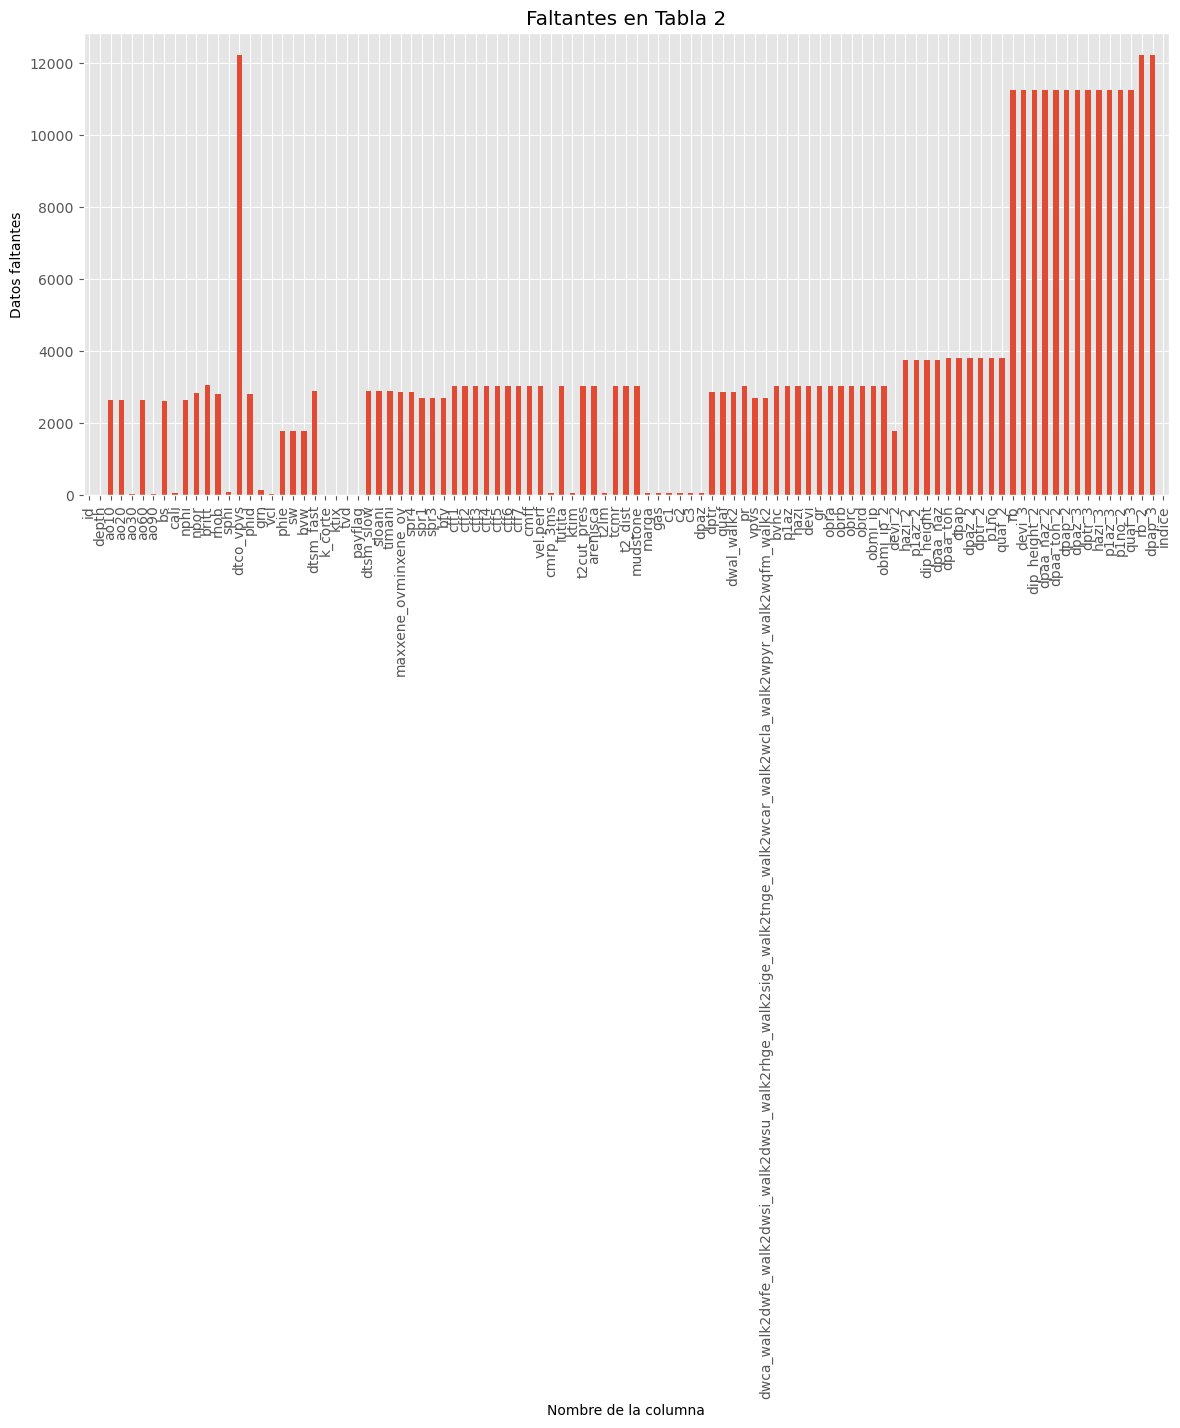

In [1458]:
# Muestra de la tabla 2 antes 
df_well_2[df_well_2 == -999.25].count().plot(kind='bar', rot= 90, title='Faltantes en Tabla 2', ylabel='Datos faltantes' , xlabel='Nombre de la columna', figsize=(14, 6))

In [1459]:
collistadjusted2 = df_well_2[df_well_2 == -999.25].count().reset_index()
collistadjusted2

,index,0
0,id,0
1,depth,0
2,ao10,2644
3,ao20,2644
4,ao30,23
...,...,...
96,p1no_2,11246
97,quaf_3,11246
98,rb_2,12215
99,dpap_3,12215


In [1460]:
collistadjusted2.rename(columns={0:'remaining_rows'}, inplace=True)
collistadjusted2

,index,remaining_rows
0,id,0
1,depth,0
2,ao10,2644
3,ao20,2644
4,ao30,23
...,...,...
96,p1no_2,11246
97,quaf_3,11246
98,rb_2,12215
99,dpap_3,12215


In [1461]:
collistadjusted2['amount_remaining'] = collistadjusted2['remaining_rows'] /df_well_2.shape[0] *100
collistadjusted2['amount_remaining']
collistadjusted2

,index,remaining_rows,amount_remaining
0,id,0,0.000000
1,depth,0,0.000000
2,ao10,2644,21.574867
3,ao20,2644,21.574867
4,ao30,23,0.187678
...,...,...,...
96,p1no_2,11246,91.766626
97,quaf_3,11246,91.766626
98,rb_2,12215,99.673603
99,dpap_3,12215,99.673603


In [1462]:
df_new2 = collistadjusted2[collistadjusted2['amount_remaining'] > 20]
df_new2

,index,remaining_rows,amount_remaining
2,ao10,2644,21.574867
3,ao20,2644,21.574867
5,ao60,2644,21.574867
7,bs,2608,21.281110
9,nphi,2646,21.591187
...,...,...,...
95,p1az_3,11246,91.766626
96,p1no_2,11246,91.766626
97,quaf_3,11246,91.766626
98,rb_2,12215,99.673603


In [1463]:
listica2 = df_new2['index']
listicaa2 =list(listica2) 
listicaa2

['ao10',
 'ao20',
 'ao60',
 'bs',
 'nphi',
 'npor',
 'britt',
 'rhob',
 'dtco_vpvs',
 'phid',
 'dtsm_fast',
 'dtsm_slow',
 'sloani',
 'timani',
 'maxxene_ovminxene_ov',
 'spr4',
 'spr1',
 'spr3',
 'bfv',
 'cff1',
 'cff2',
 'cff3',
 'cff4',
 'cff5',
 'cff6',
 'cff7',
 'cmff',
 'vel.perf',
 'lutita',
 't2cut_pres',
 'arenisca',
 'tcmr',
 't2_dist',
 'mudstone',
 'dptr',
 'quaf',
 'dwal_walk2',
 'pr',
 'vpvs',
 'dwca_walk2dwfe_walk2dwsi_walk2dwsu_walk2rhge_walk2sige_walk2tnge_walk2wcar_walk2wcla_walk2wpyr_walk2wqfm_walk2',
 'bvhc',
 'p1az',
 'hazi',
 'devi',
 'gr',
 'obra',
 'obrb',
 'obrc',
 'obrd',
 'obmi_ip',
 'obmi_ip_2',
 'hazi_2',
 'p1az_2',
 'dip_height',
 'dpaa_naz',
 'dpaa_toh',
 'dpap',
 'dpaz_2',
 'dptr_2',
 'p1no',
 'quaf_2',
 'rb',
 'devi_3',
 'dip_height_2',
 'dpaa_naz_2',
 'dpaa_toh_2',
 'dpap_2',
 'dpaz_3',
 'dptr_3',
 'hazi_3',
 'p1az_3',
 'p1no_2',
 'quaf_3',
 'rb_2',
 'dpap_3']

In [1464]:
df_well_2= df_well_2.drop(['ao10',
 'ao20',
 'ao60',
 'bs',
 'nphi',
 'npor',
 'britt',
 'rhob',
 'dtco_vpvs',
 'phid',
 'dtsm_fast',
 'dtsm_slow',
 'sloani',
 'timani',
 'maxxene_ovminxene_ov',
 'spr4',
 'spr1',
 'spr3',
 'bfv',
 'cff1',
 'cff2',
 'cff3',
 'cff4',
 'cff5',
 'cff6',
 'cff7',
 'cmff',
 'vel.perf',
 'lutita',
 't2cut_pres',
 'arenisca',
 'tcmr',
 't2_dist',
 'mudstone',
 'dptr',
 'quaf',
 'dwal_walk2',
 'pr',
 'vpvs',
 'dwca_walk2dwfe_walk2dwsi_walk2dwsu_walk2rhge_walk2sige_walk2tnge_walk2wcar_walk2wcla_walk2wpyr_walk2wqfm_walk2',
 'bvhc',
 'p1az',
 'hazi',
 'devi',
 'gr',
 'obra',
 'obrb',
 'obrc',
 'obrd',
 'obmi_ip',
 'obmi_ip_2',
 'hazi_2',
 'p1az_2',
 'dip_height',
 'dpaa_naz',
 'dpaa_toh',
 'dpap',
 'dpaz_2',
 'dptr_2',
 'p1no',
 'quaf_2',
 'rb',
 'devi_3',
 'dip_height_2',
 'dpaa_naz_2',
 'dpaa_toh_2',
 'dpap_2',
 'dpaz_3',
 'dptr_3',
 'hazi_3',
 'p1az_3',
 'p1no_2',
 'quaf_3',
 'rb_2',
 'dpap_3'], axis=1)

<Axes: title={'center': 'Faltantes en Tabla 2 luego de la remoción de columnas con más de 20% ausencia'}, xlabel='Nombre de la columna', ylabel='Datos faltantes'>

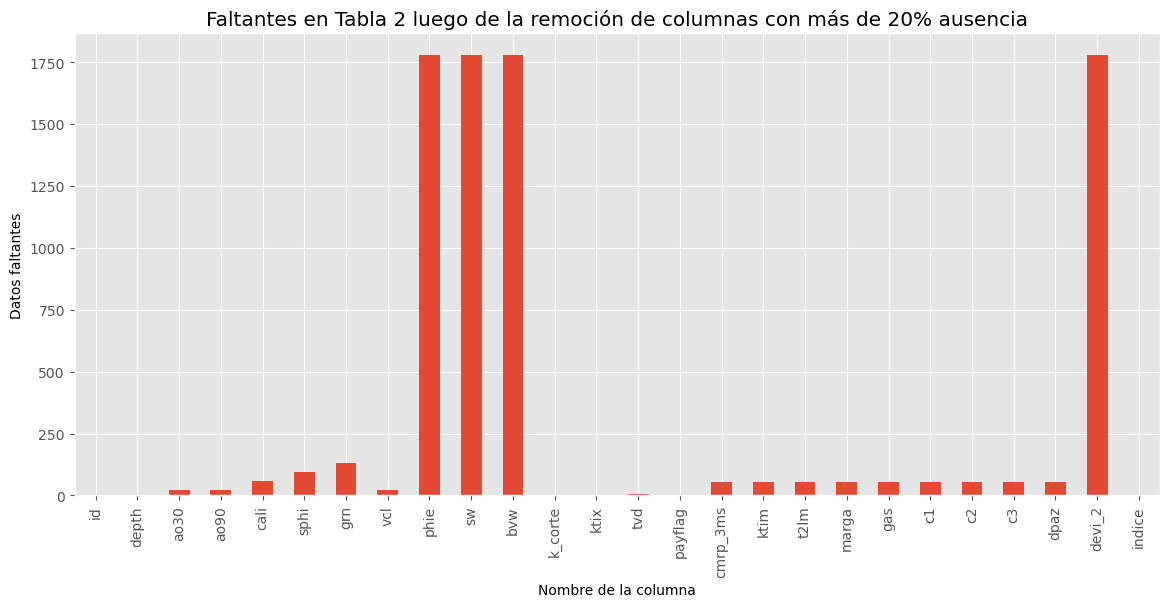

In [1465]:
# Tabla 2 luego de la remoción de columnas con más de 20%
df_well_2[df_well_2 == -999.25].count().plot(kind='bar', rot= 90, title='Faltantes en Tabla 2 luego de la remoción de columnas con más de 20% ausencia', ylabel='Datos faltantes' , xlabel='Nombre de la columna', figsize=(14, 6))

Hasta aquí se han removido 87 columnas con más del 20 % de filas con valor -999.25 en la tabla 2 que es indicativo de ausencia de datos para poder aplicar los algoritmos de clasificación. 

In [1466]:
df_well_2.shape

(12255, 26)

In [1467]:
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'payflag', 'grn', 'indice'],
      dtype='object')

In [1468]:
df_well_2.columns

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'cmrp_3ms', 'ktim',
       't2lm', 'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2', 'indice'],
      dtype='object')

### Revisión de la existencia de valores atípicos o outliers

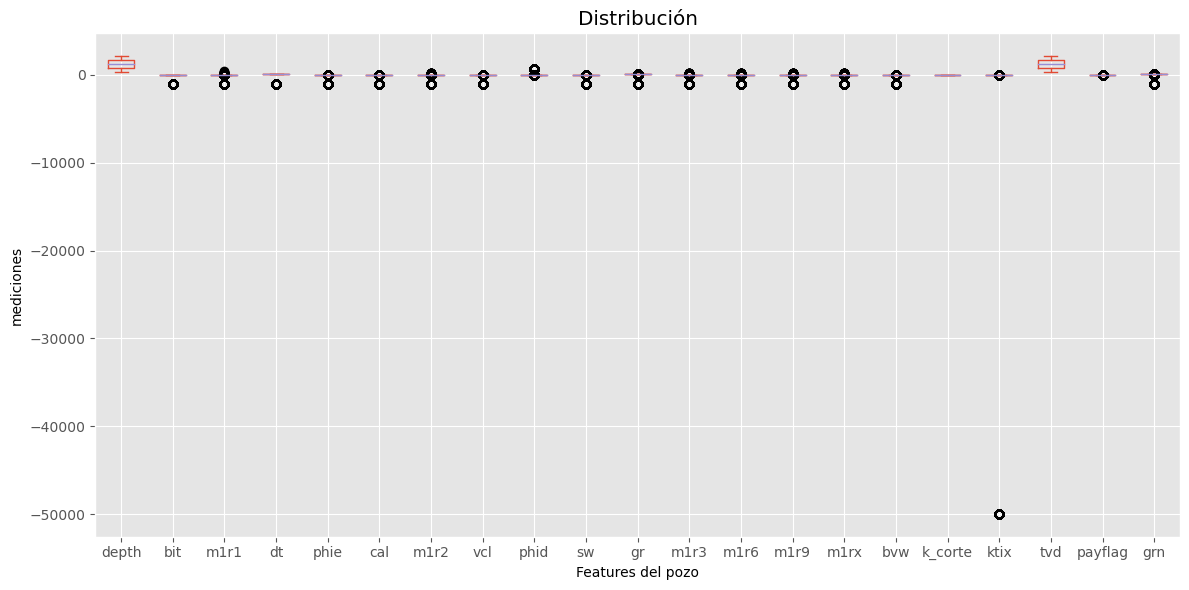

In [1469]:
#Exploring the data in Table 1 for check the presence of outliers values

plt.style.use('ggplot')

ax = df_well_1[['depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'payflag', 'grn']].plot(kind='box', title='boxplot', figsize = (12, 6))
plt.title('Distribución')
plt.xlabel('Features del pozo')
plt.ylabel('mediciones')
plt.tight_layout()
plt.show()

Como se puede apreciar de gráfico anterior de la Tabla 1, existen algunos valores atípicos sobre todo en la columna KTIX.

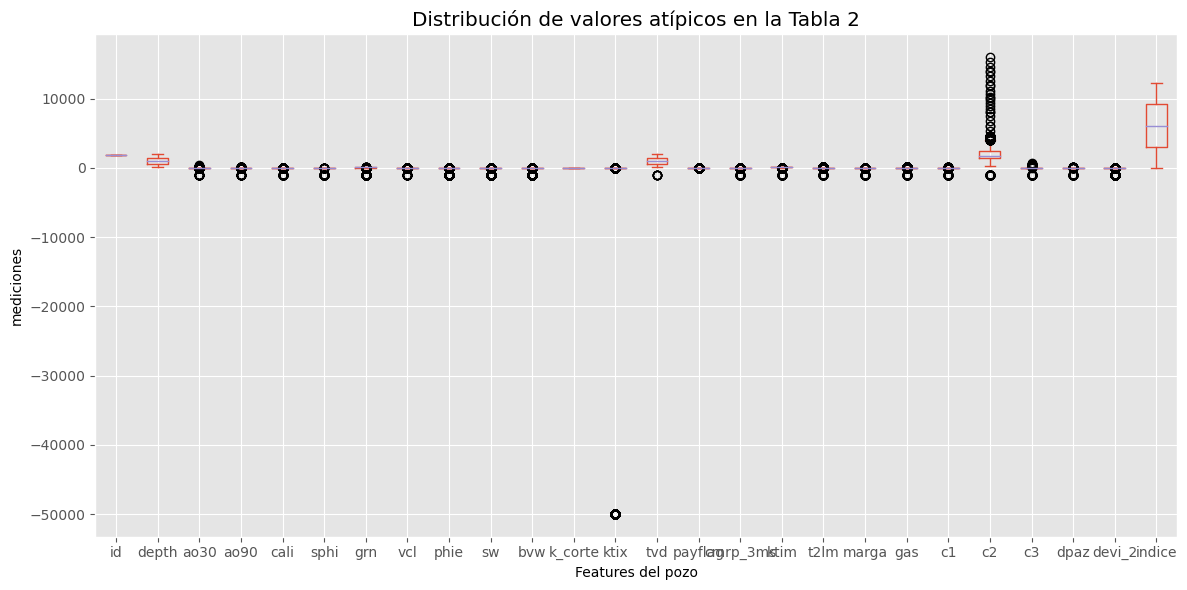

In [1470]:
#Exploring the data  in Table 2 for check the presence of outliers values

plt.style.use('ggplot')

ax = df_well_2[['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'cmrp_3ms', 'ktim',
       't2lm', 'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2', 'indice']].plot(kind='box', title='boxplot', figsize = (12, 6))
plt.title('Distribución de valores atípicos en la Tabla 2')
plt.xlabel('Features del pozo')
plt.ylabel('mediciones')
plt.tight_layout()
plt.show()

Como se puede apreciar de gráfico anterior de la Tabla 2, existen algunos valores atípicos principalmente en la columna c2 y en ktix.

### Tratamiento de los valores atípicos

### Para Tabla 1

In [1471]:
df_well_1

,id,depth,bit,m1r1,dt,phie,cal,m1r2,vcl,phid,...,m1r6,m1r9,m1rx,bvw,k_corte,ktix,tvd,payflag,grn,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,2.3390,0.7043,626.05,...,2.6667,2.7620,2.8302,0.0096,0.1,0.0000,272.9870,0,75.1565,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,2.3276,0.7086,626.05,...,2.6517,2.7453,2.8132,0.0089,0.1,0.0000,273.0632,0,74.5693,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,2.3492,0.7029,626.05,...,2.6739,2.7669,2.8353,0.0099,0.1,0.0000,273.1394,0,74.1231,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,2.3772,0.6956,626.05,...,2.7027,2.7952,2.8643,0.0112,0.1,0.0001,273.2156,0,73.8060,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,2.3826,0.6953,626.05,...,2.7053,2.7962,2.8654,0.0113,0.1,0.0001,273.2918,0,73.7377,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,1869,2123.5170,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.6639,0,-999.2500,24285
24286,1869,2123.5932,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.7401,0,-999.2500,24286
24287,1869,2123.6694,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8163,0,-999.2500,24287
24288,1869,2123.7456,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8925,0,-999.2500,24288


In [1472]:
def remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR 
    mean = X[feature].mean()    
    X.loc[X[feature] < minimum, feature] = mean
    X.loc[X[feature] > maximum, feature] = mean

In [1473]:
#X = df_well_1.drop(columns =['depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
 #      'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
 #      'ktix', 'tvd', 'payflag', 'grn'])

In [1474]:
#for i in range(len(X.columns)):    
#    remove_outlier(X.columns[i])   

In [1475]:
#df_well_1 = X
df_well_1

,id,depth,bit,m1r1,dt,phie,cal,m1r2,vcl,phid,...,m1r6,m1r9,m1rx,bvw,k_corte,ktix,tvd,payflag,grn,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,2.3390,0.7043,626.05,...,2.6667,2.7620,2.8302,0.0096,0.1,0.0000,272.9870,0,75.1565,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,2.3276,0.7086,626.05,...,2.6517,2.7453,2.8132,0.0089,0.1,0.0000,273.0632,0,74.5693,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,2.3492,0.7029,626.05,...,2.6739,2.7669,2.8353,0.0099,0.1,0.0000,273.1394,0,74.1231,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,2.3772,0.6956,626.05,...,2.7027,2.7952,2.8643,0.0112,0.1,0.0001,273.2156,0,73.8060,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,2.3826,0.6953,626.05,...,2.7053,2.7962,2.8654,0.0113,0.1,0.0001,273.2918,0,73.7377,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,1869,2123.5170,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.6639,0,-999.2500,24285
24286,1869,2123.5932,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.7401,0,-999.2500,24286
24287,1869,2123.6694,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8163,0,-999.2500,24287
24288,1869,2123.7456,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8925,0,-999.2500,24288


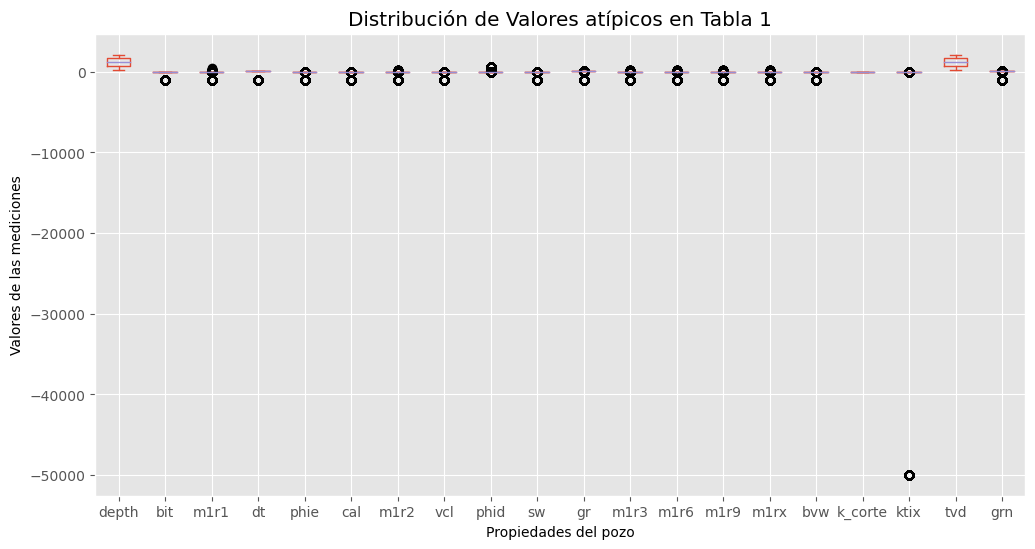

In [1476]:
#After treatment of the outliers, verification of the remaining values.

plt.style.use('ggplot')

# Plot the dataframe
ax = df_well_1[['depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'grn']].plot(kind='box', title='boxplot', figsize = (12, 6))
ax.set_title('Distribución de Valores atípicos en Tabla 1')
ax.set_xlabel('Propiedades del pozo')
ax.set_ylabel('Valores de las mediciones')
plt.show()

In [1477]:
df_well_1['ktix'].min()

-49950.0

Notar que el valor extremo en la columna KTIX del pozo 1 es de -49950.0

### Para Tabla 2

In [1478]:
df_well_2

,id,depth,ao30,ao90,cali,sphi,grn,vcl,phie,sw,...,ktim,t2lm,marga,gas,c1,c2,c3,dpaz,devi_2,indice
0,1891,109.0856,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0
1,1891,109.2380,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
2,1891,109.3904,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2
3,1891,109.5428,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,3
4,1891,109.6952,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,1891,1975.9856,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12250
12251,1891,1976.1380,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12251
12252,1891,1976.2904,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12252
12253,1891,1976.4428,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12253


In [1479]:
#X = df_well_2.drop(columns =['depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
#       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'cmrp_3ms', 'ktim',
#       't2lm', 'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2'])

In [1480]:
#for i in range(len(X.columns)):    
 #   remove_outlier(X.columns[i])   

In [1481]:
#df_well_2 = X
df_well_2

,id,depth,ao30,ao90,cali,sphi,grn,vcl,phie,sw,...,ktim,t2lm,marga,gas,c1,c2,c3,dpaz,devi_2,indice
0,1891,109.0856,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0
1,1891,109.2380,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
2,1891,109.3904,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2
3,1891,109.5428,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,3
4,1891,109.6952,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,1891,1975.9856,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12250
12251,1891,1976.1380,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12251
12252,1891,1976.2904,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12252
12253,1891,1976.4428,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12253


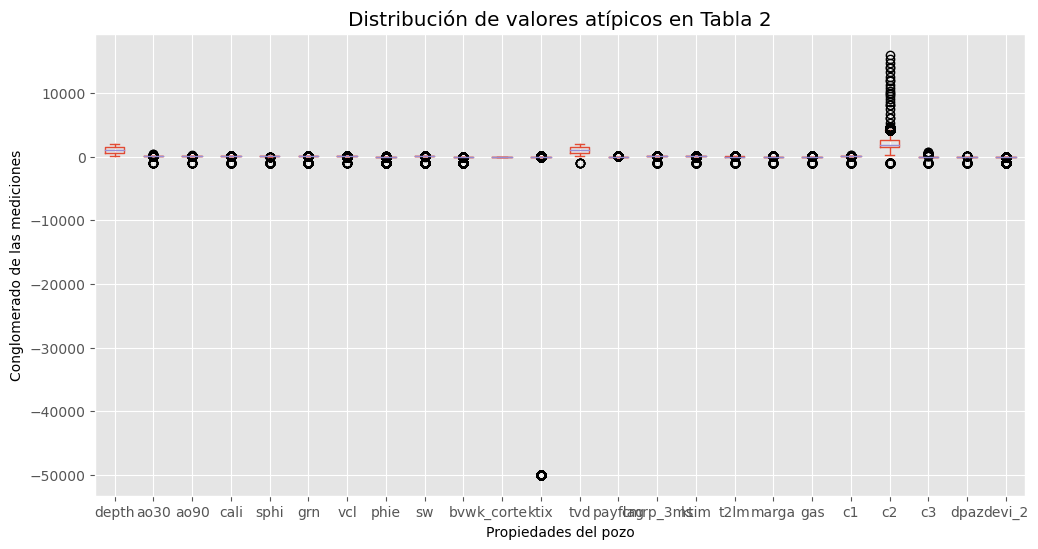

In [1482]:
#After treatment of the outliers, verification of the remaining values.

plt.style.use('ggplot')

# Plot the dataframe
ax = df_well_2[['depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'cmrp_3ms', 'ktim',
       't2lm', 'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2']].plot(kind='box', title='boxplot', figsize = (12, 6))
ax.set_title('Distribución de valores atípicos en Tabla 2')
ax.set_xlabel('Propiedades del pozo')
ax.set_ylabel('Conglomerado de las mediciones')
plt.show()

In [1483]:
df_well_2['ktix'].min()

-49950.0

In [1484]:
df_well_1temp = df_well_1['payflag']

In [1485]:
df_well_1temp

0        0
1        0
2        0
3        0
4        0
        ..
24285    0
24286    0
24287    0
24288    0
24289    0
Name: payflag, Length: 24290, dtype: int64

In [1486]:
df_well_1 = df_well_1.drop(columns =['payflag'], axis=1)

In [1487]:
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'grn', 'indice'],
      dtype='object')

# Segunda variante en la limpieza de valores outliers

In [1488]:
# Contabilizando outliers Tabla 1

def remove_outlier(feature):  
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    mean = X[feature].mean()
    print( 'media:', mean)
    """
    # any value beyond the acceptance range are considered
    as outliers.
    # we replace the outliers with the mean value of that
    feature.
    """
    #if(X.loc[X[feature] < minimum]):
    X.loc[X[feature] < minimum, feature] = mean
    print( 'minimum',minimum)
     #   cantidad_registros_outliers +=1
    #if X[feature] > maximum:
    X.loc[X[feature] > maximum, feature] = mean
      #  cantidad_registros_outliers +=1
    print( 'maximum',maximum)
    print("Cantidad",len(X.columns))    
    
    changed = round((X[X[feature] == mean].shape[0] / X.shape[0]) * 100, 2) 
     

# taking all the columns except the last one
# last column is the label
    return changed

In [1489]:
df_well_1

,id,depth,bit,m1r1,dt,phie,cal,m1r2,vcl,phid,...,m1r3,m1r6,m1r9,m1rx,bvw,k_corte,ktix,tvd,grn,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,2.3390,0.7043,626.05,...,2.5147,2.6667,2.7620,2.8302,0.0096,0.1,0.0000,272.9870,75.1565,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,2.3276,0.7086,626.05,...,2.4998,2.6517,2.7453,2.8132,0.0089,0.1,0.0000,273.0632,74.5693,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,2.3492,0.7029,626.05,...,2.5204,2.6739,2.7669,2.8353,0.0099,0.1,0.0000,273.1394,74.1231,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,2.3772,0.6956,626.05,...,2.5476,2.7027,2.7952,2.8643,0.0112,0.1,0.0001,273.2156,73.8060,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,2.3826,0.6953,626.05,...,2.5505,2.7053,2.7962,2.8654,0.0113,0.1,0.0001,273.2918,73.7377,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,1869,2123.5170,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.6639,-999.2500,24285
24286,1869,2123.5932,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.7401,-999.2500,24286
24287,1869,2123.6694,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8163,-999.2500,24287
24288,1869,2123.7456,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8925,-999.2500,24288


In [1490]:
percentage_outliers = {}
cantidad_registros_outliers = 0

In [1491]:
X = df_well_1.iloc[:, :-1]
for i in range(len(X.columns)):
    percentage_outliers[X.columns[i]] = remove_outlier(X.columns[i])

media: 1869.0
minimum 1869.0
maximum 1869.0
Cantidad 21
media: 1198.4109
minimum -652.4108999999995
maximum 3049.2326999999996
Cantidad 21
media: -164.71315356113627
minimum 6.75
maximum 6.75
Cantidad 21
media: -5.188658242074929
minimum -1.3873500000000005
maximum 8.16385
Cantidad 21
media: 69.80150468505558
minimum 35.788587499999984
maximum 148.5608875
Cantidad 21
media: -24.255817184026345
minimum -0.029312500000000005
maximum 0.0493875
Cantidad 21
media: -165.7463445491972
minimum 6.4497
maximum 6.7545
Cantidad 21
media: -5.614187295183203
minimum -0.9937750000000016
maximum 7.5736250000000025
Cantidad 21
media: -9.380791066282422
minimum 0.35810000000000003
maximum 1.1205
Cantidad 21
media: 108.08630930012352
minimum -0.11389999999999999
maximum 0.36369999999999997
Cantidad 21
media: -23.333036109510086
minimum 1.0
maximum 1.0
Cantidad 21
media: 43.86218768217373
minimum 46.48939999999999
maximum 91.94040000000001
Cantidad 21
media: -5.750436253602305
minimum -0.7751625
maximum 7

In [1492]:
print(percentage_outliers) 

{'id': 100.0, 'depth': 0.0, 'bit': 17.04, 'm1r1': 9.29, 'dt': 2.11, 'phie': 16.68, 'cal': 23.82, 'm1r2': 9.46, 'vcl': 10.1, 'phid': 18.13, 'sw': 12.11, 'gr': 9.44, 'm1r3': 9.61, 'm1r6': 9.87, 'm1r9': 10.0, 'm1rx': 10.21, 'bvw': 11.18, 'k_corte': 0.0, 'ktix': 24.6, 'tvd': 0.0, 'grn': 9.15}


In [1493]:
# Calculando el porcentaje de datos atípicos
cant_out = (100*cantidad_registros_outliers)/5905
print( 'cant_out en prciento:', cant_out)

cant_out en prciento: 0.0


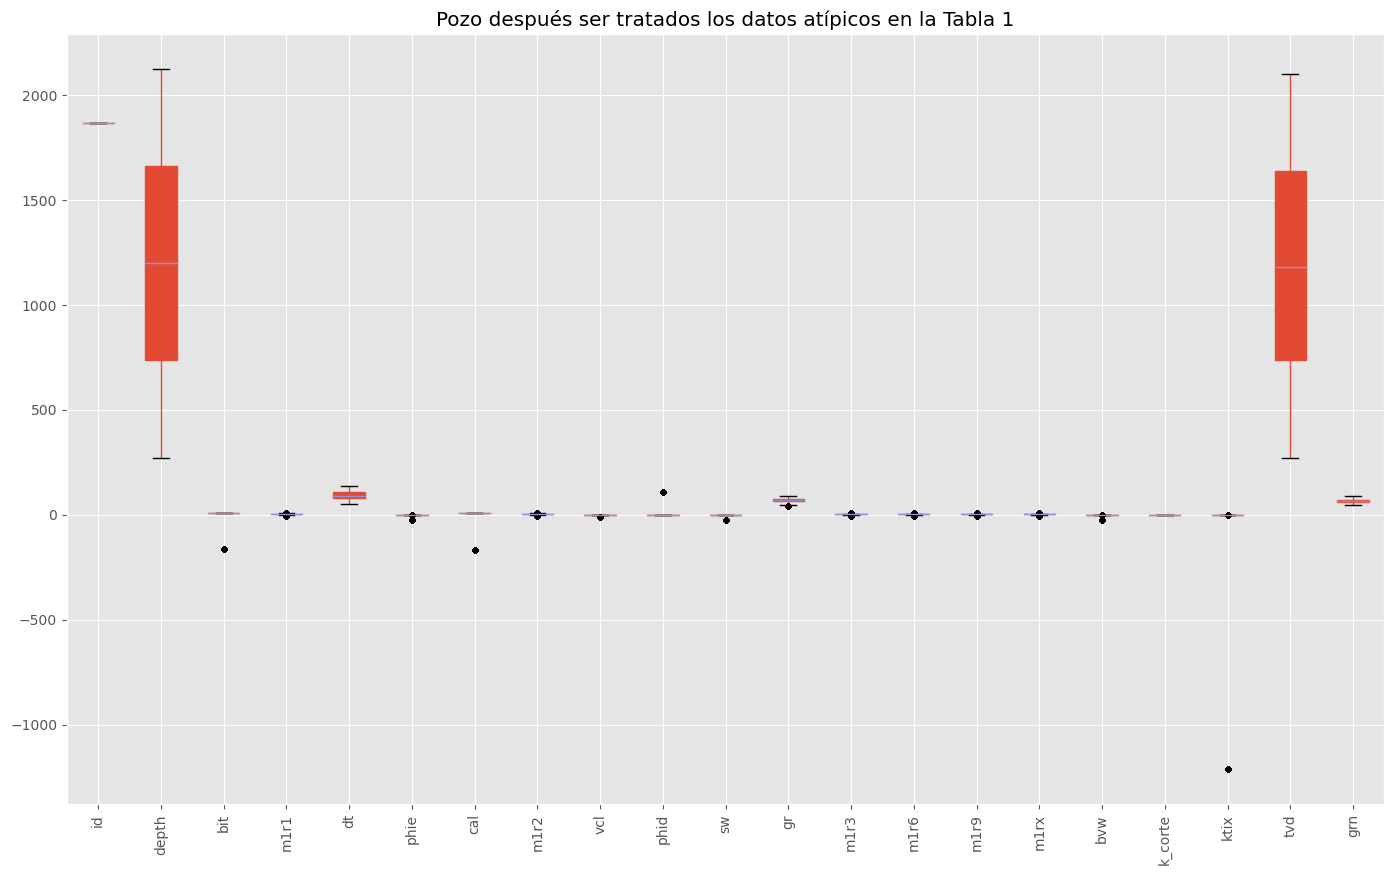

In [1494]:
plt.subplots(figsize=(17,10))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)    
plt.title("Pozo después ser tratados los datos atípicos en la Tabla 1")
plt.show()

In [1495]:
df_well_1 = X
df_well_1

,id,depth,bit,m1r1,dt,phie,cal,m1r2,vcl,phid,...,gr,m1r3,m1r6,m1r9,m1rx,bvw,k_corte,ktix,tvd,grn
0,1869,273.0000,-164.713154,2.131600,116.380700,0.009600,-165.746345,2.339000,0.704300,108.086309,...,77.471700,2.514700,2.666700,2.7620,2.830200,0.009600,0.1,0.000000,272.9870,75.156500
1,1869,273.0762,-164.713154,2.128100,116.512000,0.008900,-165.746345,2.327600,0.708600,108.086309,...,76.884500,2.499800,2.651700,2.7453,2.813200,0.008900,0.1,0.000000,273.0632,74.569300
2,1869,273.1524,-164.713154,2.152600,116.659700,0.009900,-165.746345,2.349200,0.702900,108.086309,...,76.438300,2.520400,2.673900,2.7669,2.835300,0.009900,0.1,0.000000,273.1394,74.123100
3,1869,273.2286,-164.713154,2.182300,116.764600,0.011200,-165.746345,2.377200,0.695600,108.086309,...,76.121200,2.547600,2.702700,2.7952,2.864300,0.011200,0.1,0.000100,273.2156,73.806000
4,1869,273.3048,-164.713154,2.192200,117.066200,0.011300,-165.746345,2.382600,0.695300,108.086309,...,76.052900,2.550500,2.705300,2.7962,2.865400,0.011300,0.1,0.000100,273.2918,73.737700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,1869,2123.5170,6.750000,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,...,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,0.1,-1213.268159,2102.6639,50.974842
24286,1869,2123.5932,6.750000,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,...,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,0.1,-1213.268159,2102.7401,50.974842
24287,1869,2123.6694,6.750000,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,...,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,0.1,-1213.268159,2102.8163,50.974842
24288,1869,2123.7456,6.750000,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,...,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,0.1,-1213.268159,2102.8925,50.974842


In [1496]:
df_well_1['ktix'].min()

-1213.2681587443394

In [1497]:
df_well_1['payflag'] = df_well_1temp

In [1498]:
df_well_1['payflag'].unique()

array([0, 1], dtype=int64)

Notar ahora que el valor extremo en la columna KTIX del pozo 1 es de -1213.26

In [1499]:
df_well_2temp = df_well_2['payflag']

In [1500]:
df_well_2 = df_well_2.drop(columns =['payflag'], axis=1)

In [1501]:
df_well_2.columns

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'cmrp_3ms', 'ktim', 't2lm',
       'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2', 'indice'],
      dtype='object')

In [1502]:
# Contabilizando outliers Tabla 2

def remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    mean = X[feature].mean()
    print( 'media:', mean)
    """
    # any value beyond the acceptance range are considered
    as outliers.
    # we replace the outliers with the mean value of that
    feature.
    """
    #if(X.loc[X[feature] < minimum]):
    X.loc[X[feature] < minimum, feature] = mean
    print( 'minimum',minimum)
     #   cantidad_registros_outliers +=1
    #if X[feature] > maximum:
    X.loc[X[feature] > maximum, feature] = mean
      #  cantidad_registros_outliers +=1
    print( 'maximum',maximum)
    print("Cantidad",len(X.columns))    
    
    changed = round((X[X[feature] == mean].shape[0] / X.shape[0]) * 100, 2) 
     

# taking all the columns except the last one
# last column is the label
    return changed

In [1503]:
# Para Tabla 2
percentage_outliers = {}
cantidad_registros_outliers = 0

In [1504]:
X = df_well_2.iloc[:, :-1]
for i in range(len(X.columns)):
    percentage_outliers[X.columns[i]] = remove_outlier(X.columns[i])

media: 1891.0
minimum 1891.0
maximum 1891.0
Cantidad 24
media: 1042.8404
minimum -824.6692
maximum 2910.35
Cantidad 24
media: 3.1817935944512445
minimum -1.6057250000000005
maximum 8.503675000000001
Cantidad 24
media: 3.095323476132191
minimum -0.7615749999999997
maximum 7.976624999999999
Cantidad 24
media: 4.715157837617299
minimum 7.800125000000001
maximum 9.798324999999998
Cantidad 24
media: -7.502605450836393
minimum -0.006874999999999992
maximum 0.502525
Cantidad 24
media: 56.305499102407175
minimum 39.186375000000005
maximum 97.72337499999998
Cantidad 24
media: -1.2356083720930233
minimum 0.23217499999999996
maximum 1.103175
Cantidad 24
media: -144.86835422276621
minimum -0.061700000000000005
maximum 0.10389999999999999
Cantidad 24
media: -144.08425139126888
minimum 0.5803750000000001
maximum 1.2517749999999999
Cantidad 24
media: -144.87190939208486
minimum -0.05105000000000001
maximum 0.08615
Cantidad 24
media: 0.10000000000000002
minimum 0.1
maximum 0.1
Cantidad 24
media: -7242

In [1505]:
print(percentage_outliers) 

{'id': 100.0, 'depth': 0.01, 'ao30': 7.66, 'ao90': 8.31, 'cali': 21.53, 'sphi': 0.91, 'grn': 4.5, 'vcl': 6.37, 'phie': 18.48, 'sw': 19.05, 'bvw': 18.86, 'k_corte': 0.0, 'ktix': 33.42, 'tvd': 0.05, 'cmrp_3ms': 8.3, 'ktim': 16.39, 't2lm': 14.3, 'marga': 1.53, 'gas': 2.82, 'c1': 5.12, 'c2': 5.12, 'c3': 0.61, 'dpaz': 0.61, 'devi_2': 28.94}


In [1506]:
# Calculando el porcentaje de datos atípicos
cant_out = (100*cantidad_registros_outliers)/5905
print( 'cant_out en prciento:', cant_out)

cant_out en prciento: 0.0


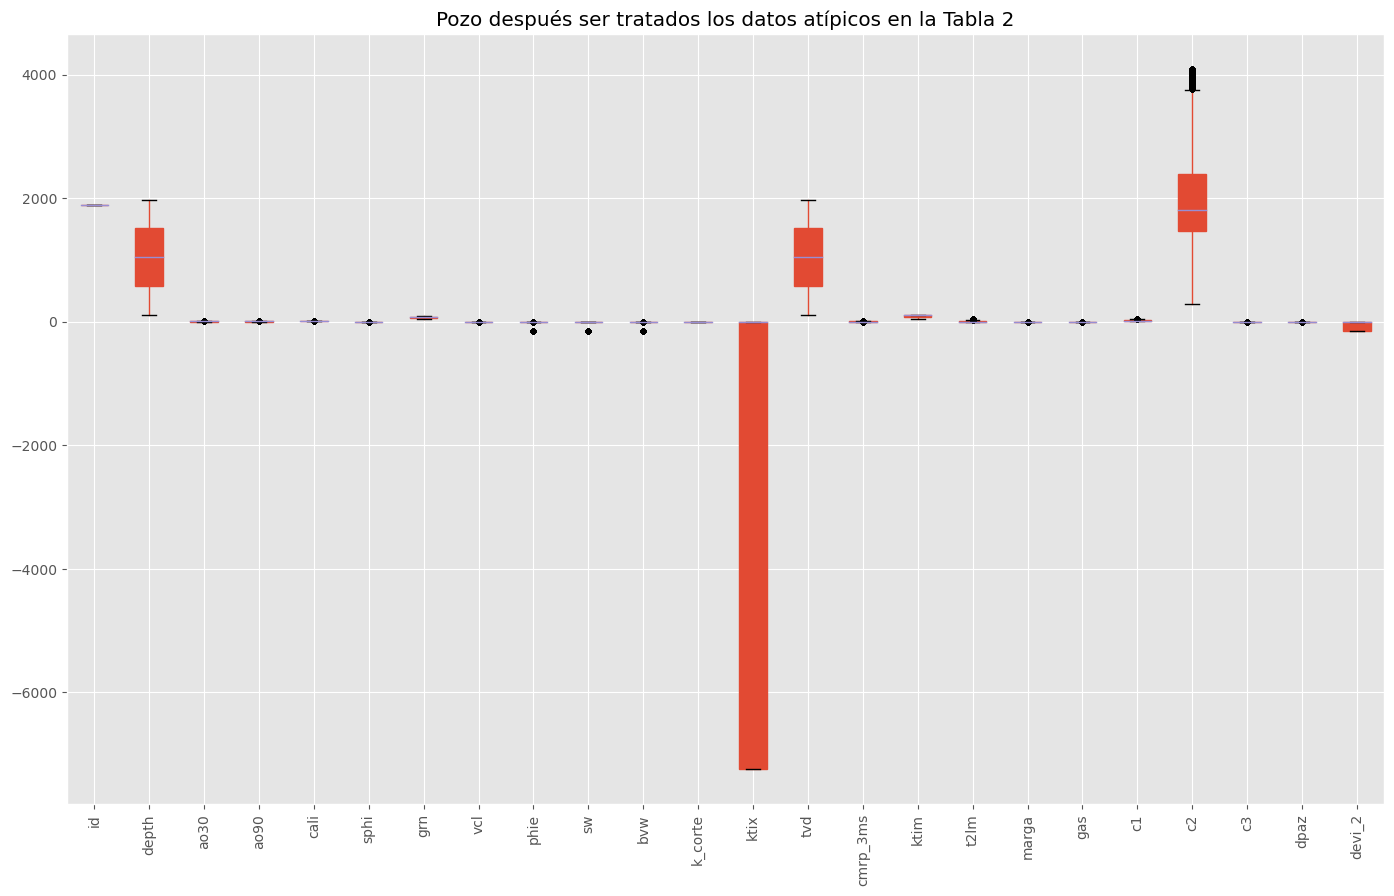

In [1507]:
plt.subplots(figsize=(17,10))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)    
plt.title("Pozo después ser tratados los datos atípicos en la Tabla 2")
plt.show()

In [1508]:
df_well_2 = X
df_well_2

,id,depth,ao30,ao90,cali,sphi,grn,vcl,phie,sw,...,cmrp_3ms,ktim,t2lm,marga,gas,c1,c2,c3,dpaz,devi_2
0,1891,109.0856,3.181794,3.095323,4.715158,-7.502605,56.305499,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
1,1891,109.2380,3.181794,3.095323,4.715158,-7.502605,56.305499,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
2,1891,109.3904,3.181794,3.095323,4.715158,-7.502605,56.305499,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
3,1891,109.5428,3.181794,3.095323,4.715158,-7.502605,56.305499,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
4,1891,109.6952,3.181794,3.095323,4.715158,-7.502605,56.305499,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,1891,1975.9856,3.181794,3.095323,8.459800,-7.502605,60.660200,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
12251,1891,1976.1380,3.181794,3.095323,8.459800,-7.502605,60.660200,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
12252,1891,1976.2904,3.181794,3.095323,8.459800,-7.502605,60.660200,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
12253,1891,1976.4428,3.181794,3.095323,8.459800,-7.502605,60.660200,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733


In [1509]:
df_well_2.columns

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'cmrp_3ms', 'ktim', 't2lm',
       'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2'],
      dtype='object')

In [1510]:
df_well_2['ktim'].unique()

array([ 77.93447572, 100.        ,  98.5714    ,  97.1429    ,
        95.7143    ,  94.2857    ,  92.8571    ,  91.4286    ,
        90.        ,  88.3333    ,  86.6667    ,  85.        ,
        83.3333    ,  81.6667    ,  80.        ,  78.5714    ,
        77.1429    ,  75.7143    ,  74.2857    ,  72.8571    ,
        71.4286    ,  70.        ,  81.4286    ,  82.8571    ,
        84.2857    ,  85.7143    ,  87.1429    ,  88.5714    ,
        98.3333    ,  96.6667    ,  95.        ,  93.3333    ,
        91.6667    ,  68.5714    ,  61.4286    ,  54.2857    ,
        50.        ,  55.        ,  60.        ,  65.        ,
        64.2857    ,  58.5714    ,  52.8571    ,  51.4286    ,
        55.7143    ,  75.        ,  65.7143    ,  56.6667    ,
        53.3333    ,  57.1429    ,  76.6667    ,  73.3333    ,
        66.6667    ,  63.3333    ,  62.8571    ,  61.6667    ,
        68.3333    ,  71.6667    ,  78.3333    ,  58.3333    ,
        67.1429    ])

In [1511]:
df_well_2['ktix'].min()

-7242.832337152184

Notar ahora que el valor extremo en la columna KTIX del pozo 2 que antes era de -49950.0 ahora ha sido reducido a -7242.83

In [1512]:
df_well_2['payflag'] = df_well_2temp

In [1513]:
df_well_2['payflag'].unique()

array([0, 1], dtype=int64)

### Revisión de las features importance 

[0 0 0 ... 0 0 0]


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Predicted labels [0 0 0 ... 0 0 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


importance: 16    0.12
5     0.09
10    0.08
7     0.06
9     0.06
3     0.06
8     0.06
19    0.05
1     0.05
12    0.05
14    0.05
4     0.05
15    0.05
13    0.05
6     0.04
11    0.03
20    0.03
18    0.01
2     0.00
17    0.00
0     0.00
Name: importance, dtype: float64


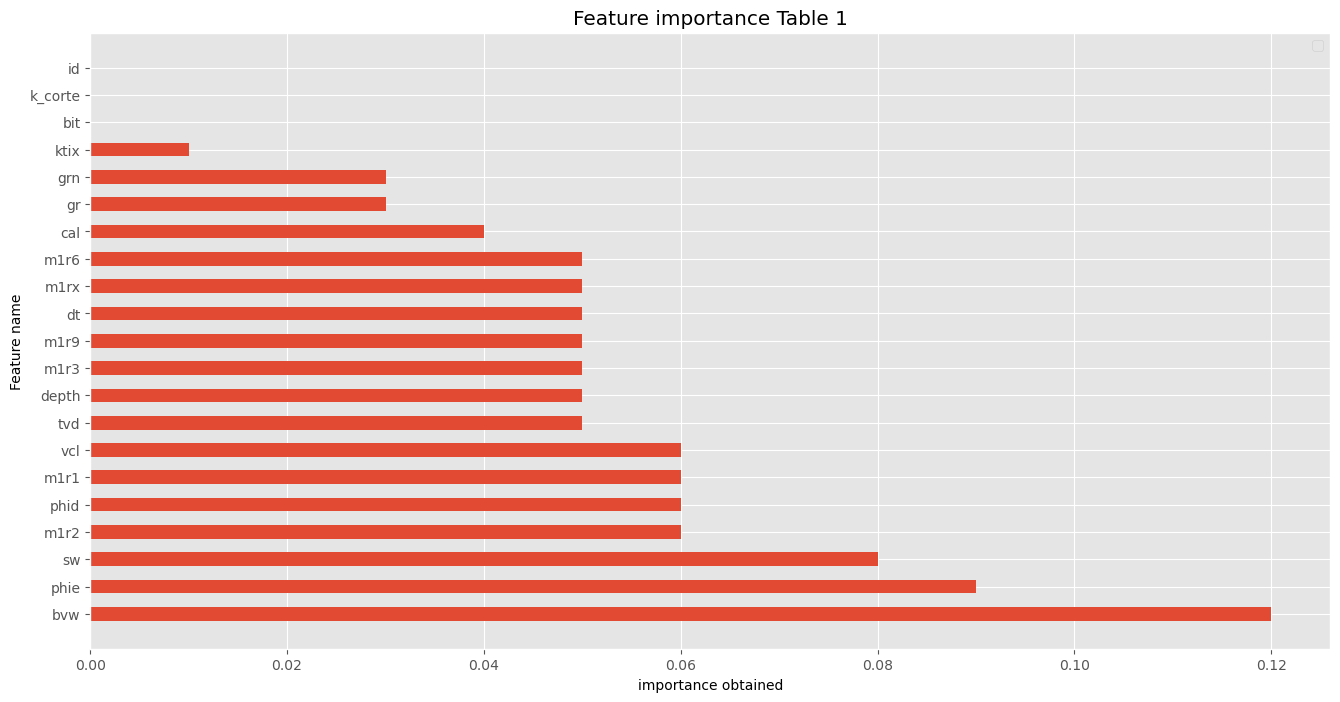

In [1514]:
X = df_well_1.drop(['payflag'], axis=1)
y = df_well_1['payflag'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7309, stratify=y, test_size=0.33) 

# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression(solver='liblinear')],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, refit=True)

#print("values:", X_test)
#print("Values of y_test:", y_test)

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_test)

#view transformed values
print(y_transformed)

best_model = clf.fit(X_test, y_transformed)

# Fit grid search
model = best_model.best_estimator_

# View best model

y_hat = model.predict(X_test)

classification_report(y_transformed, y_hat)
#plt.show()

# Predict target vector
print('Predicted labels', y_hat)

fr = RandomForestClassifier( 
        bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False
        
        )
#min_impurity_split=None,
lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(y_train)

fr.fit(X_train, y_train_transformed)
#fr.fit(X_train, y_train)

y_hat = fr.predict(X_test)

df = pd.DataFrame(fr.feature_importances_, X.columns)
df.reset_index(drop=False, inplace=True)
df.columns = ['feature', 'importance']
df.sort_values('importance', inplace=True, ascending=False)

df['indice'] = df.index         
#df['ID'] = value2 
#dataset['ID'].iloc[0].astype(int)

df.to_csv("Features_Importance_Pozo_1_PCA.csv")

fig, axis = plt.subplots(figsize=(16, 8))

#labels = df['importance']

df['importance']= df['importance'].round(decimals = 2)

#N = len(df['importance'])
x = df['feature']
y = df['importance']

print("importance:", y)

bars = axis.barh(x, y, 0.5)
plt.title('Feature importance Table 1')
plt.ylabel('Feature name')
plt.xlabel('importance obtained')
plt.legend(loc='upper right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


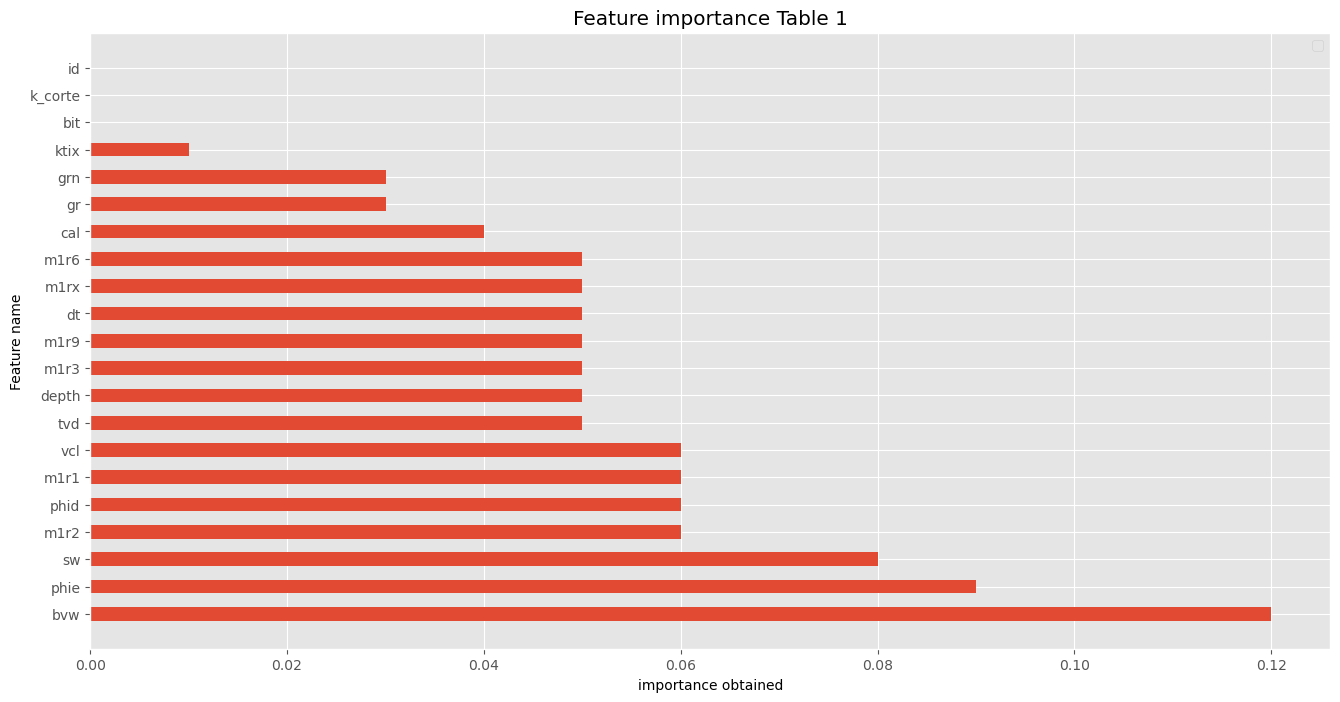

In [1515]:
fig, axis = plt.subplots(figsize=(16, 8))

x = df['feature']
y = df['importance']

df['importance']= df['importance'].round(decimals = 2)
bars = axis.barh(x, y, 0.5)
plt.title('Feature importance Table 1')
plt.ylabel('Feature name')
plt.xlabel('importance obtained')
plt.legend(loc='upper right')

### De la tabla 2 

[0 0 0 ... 0 0 0]


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

Predicted labels [0 0 0 ... 0 0 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


importance: 9     0.23
8     0.09
10    0.08
7     0.08
6     0.06
5     0.05
13    0.05
12    0.05
1     0.05
23    0.04
2     0.03
3     0.03
4     0.03
20    0.02
16    0.02
19    0.02
15    0.02
14    0.02
18    0.00
17    0.00
21    0.00
22    0.00
11    0.00
0     0.00
Name: importance, dtype: float64


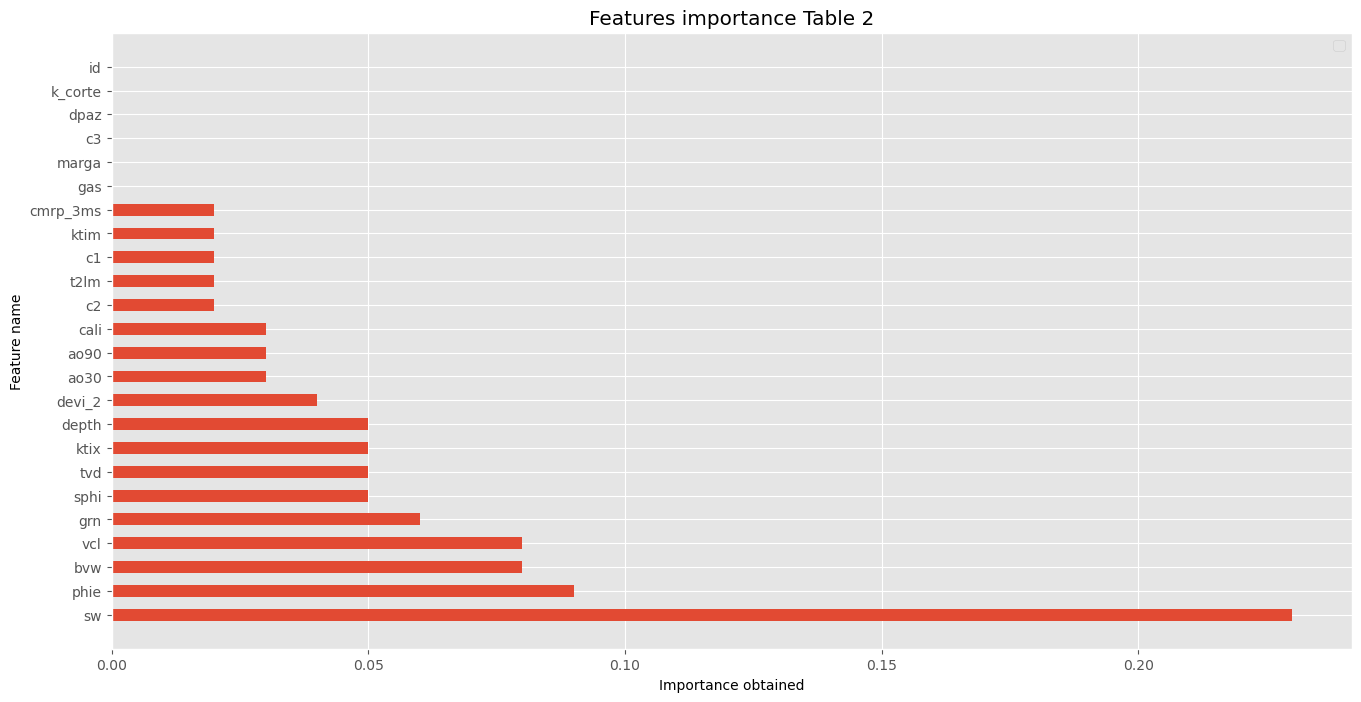

In [1516]:
X = df_well_2.drop(['payflag'], axis=1)
y = df_well_2['payflag'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7309, stratify=y, test_size=0.33) 

# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression(solver='liblinear')],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, refit=True)

#print("values:", X_test)
#print("Values of y_test:", y_test)

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_test)

#view transformed values
print(y_transformed)

best_model = clf.fit(X_test, y_transformed)

# Fit grid search
model = best_model.best_estimator_

# View best model

y_hat = model.predict(X_test)

classification_report(y_transformed, y_hat)
#plt.show()

# Predict target vector
print('Predicted labels', y_hat)

fr = RandomForestClassifier( 
        bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False
        
        )
#min_impurity_split=None,
lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(y_train)

fr.fit(X_train, y_train_transformed)
#fr.fit(X_train, y_train)

y_hat = fr.predict(X_test)

df = pd.DataFrame(fr.feature_importances_, X.columns)
df.reset_index(drop=False, inplace=True)
df.columns = ['feature', 'importance']
df.sort_values('importance', inplace=True, ascending=False)

df['indice'] = df.index         
#df['ID'] = value2 
#dataset['ID'].iloc[0].astype(int)

df.to_csv("Features_Importance_Pozo_2_PCA.csv")

fig, axis = plt.subplots(figsize=(16, 8))

#labels = df['importance']

df['importance']= df['importance'].round(decimals = 2)

#N = len(df['importance'])
x = df['feature']
y = df['importance']

print("importance:", y)

bars = axis.barh(x, y, 0.5)
plt.title('Features importance Table 2')
plt.ylabel('Feature name')
plt.xlabel('Importance obtained')
plt.legend(loc='upper right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


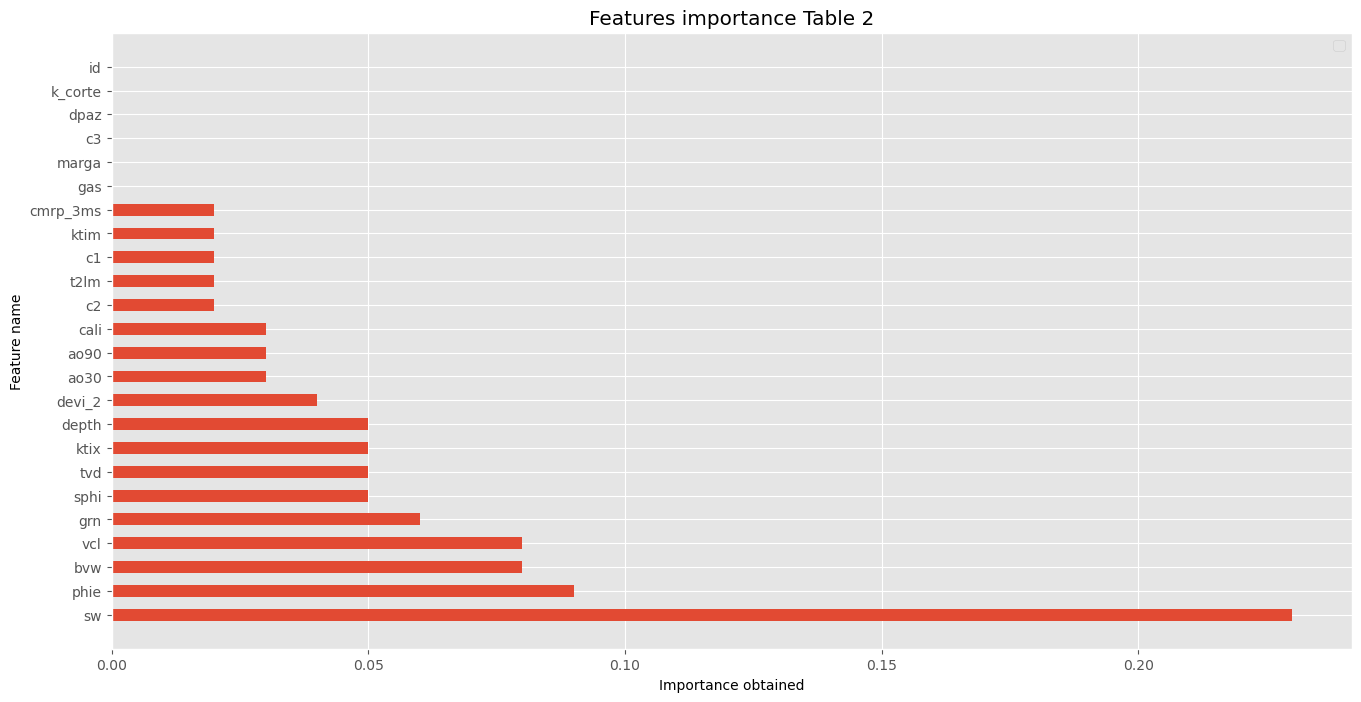

In [1517]:
fig, axis = plt.subplots(figsize=(16, 8))

x = df['feature']
y = df['importance']

df['importance']= df['importance'].round(decimals = 2)
bars = axis.barh(x, y, 0.5)
plt.title('Features importance Table 2')
plt.ylabel('Feature name')
plt.xlabel('Importance obtained')
plt.legend(loc='upper right')

Fueron eliminadas de Tabla 1 'k_corte', 'bit' pues no aportan a explicar la importancia de las variables, y en la tabla 2 fueron eliminadas 'k_corte', 'c3', 'dpaz','gas','marga' que tampoco aportan a la explicación de las variables.

In [1518]:
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'grn', 'payflag'],
      dtype='object')

In [1519]:
df_well_1 = df_well_1.drop(['k_corte', 'bit'], axis=1)

In [1520]:
listica1 = df_well_1.columns
listica1

Index(['id', 'depth', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl', 'phid', 'sw',
       'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'ktix', 'tvd', 'grn',
       'payflag'],
      dtype='object')

In [1521]:
listica1 = listica1.sort_values(ascending=False)

In [1522]:
df_well_2.columns

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'cmrp_3ms', 'ktim', 't2lm',
       'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2', 'payflag'],
      dtype='object')

In [1523]:
df_well_2 = df_well_2.drop(['k_corte', 'c3', 'dpaz','gas','marga'], axis=1)

In [1524]:
listica2= df_well_2.columns
listica2

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'ktix', 'tvd', 'cmrp_3ms', 'ktim', 't2lm', 'c1', 'c2',
       'devi_2', 'payflag'],
      dtype='object')

In [1525]:
listica2 = listica2.sort_values(ascending=False)

In [1526]:
#df_query1 = pd.DataFrame()
df_query1 = pd.DataFrame({'table1': listica1, 
                   'table2': listica2})
df_query1

,table1,table2
0,vcl,vcl
1,tvd,tvd
2,sw,t2lm
3,phie,sw
4,phid,sphi
5,payflag,phie
6,m1rx,payflag
7,m1r9,ktix
8,m1r6,ktim
9,m1r3,id


## Revisando las correlaciones entre las features para cada tabla

## Pearson correlation

In [1527]:
df_well_1.drop(['id'], axis=1)

,depth,m1r1,dt,phie,cal,m1r2,vcl,phid,sw,gr,m1r3,m1r6,m1r9,m1rx,bvw,ktix,tvd,grn,payflag
0,273.0000,2.131600,116.380700,0.009600,-165.746345,2.339000,0.704300,108.086309,1.000000,77.471700,2.514700,2.666700,2.7620,2.830200,0.009600,0.000000,272.9870,75.156500,0
1,273.0762,2.128100,116.512000,0.008900,-165.746345,2.327600,0.708600,108.086309,1.000000,76.884500,2.499800,2.651700,2.7453,2.813200,0.008900,0.000000,273.0632,74.569300,0
2,273.1524,2.152600,116.659700,0.009900,-165.746345,2.349200,0.702900,108.086309,1.000000,76.438300,2.520400,2.673900,2.7669,2.835300,0.009900,0.000000,273.1394,74.123100,0
3,273.2286,2.182300,116.764600,0.011200,-165.746345,2.377200,0.695600,108.086309,1.000000,76.121200,2.547600,2.702700,2.7952,2.864300,0.011200,0.000100,273.2156,73.806000,0
4,273.3048,2.192200,117.066200,0.011300,-165.746345,2.382600,0.695300,108.086309,1.000000,76.052900,2.550500,2.705300,2.7962,2.865400,0.011300,0.000100,273.2918,73.737700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,2123.5170,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,-23.333036,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,-1213.268159,2102.6639,50.974842,0
24286,2123.5932,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,-23.333036,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,-1213.268159,2102.7401,50.974842,0
24287,2123.6694,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,-23.333036,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,-1213.268159,2102.8163,50.974842,0
24288,2123.7456,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,-23.333036,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,-1213.268159,2102.8925,50.974842,0


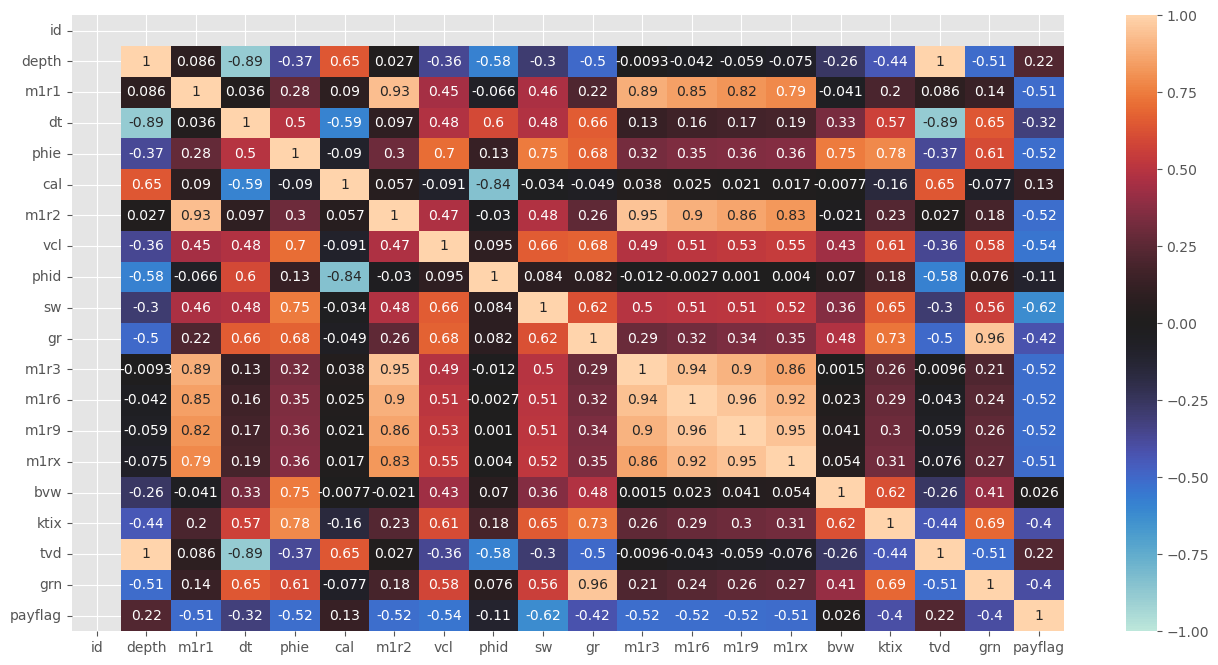

In [1528]:
#Correlation matrix/Heatmap para Tabla 1

fig= plt.subplots(figsize=(16,8))  
sns.heatmap(df_well_1.corr() , annot = True, vmin=-1, vmax=1, center= 0)
plt.savefig("Correlation-Matrix-Pearson_Pozo-1.png", dpi=600, bbox_inches='tight', pad_inches=0.5)

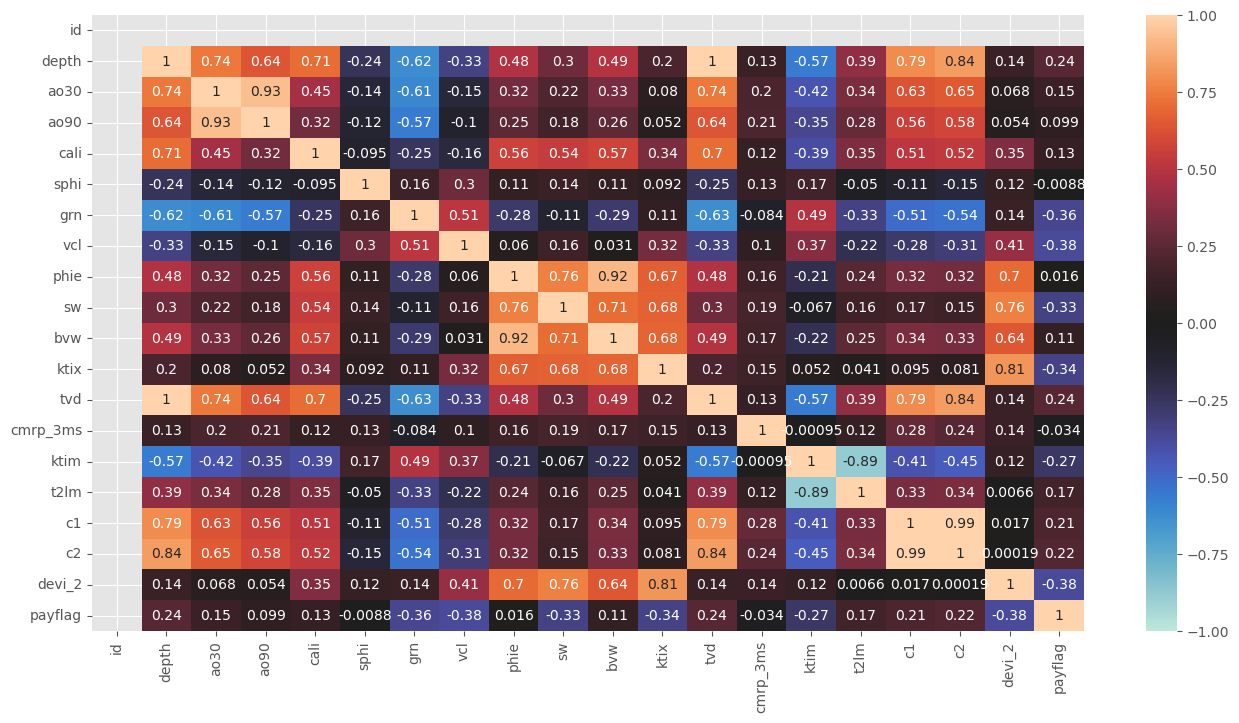

In [1529]:
#Correlation matrix/Heatmap para Tabla 2

fig= plt.subplots(figsize=(16,8))  
sns.heatmap(df_well_2.corr() , annot = True, vmin=-1, vmax=1, center= 0)
plt.savefig("Correlation-Matrix-Pearson_Pozo-2.png", dpi=600, bbox_inches='tight', pad_inches=0.5)

Se observa de las matrices de correlaciones anteriores que las features con correlaciones positivas son:



## Conclusión de la parte de exploración,  limpieza y preparación de los datos

Se revisaron los 2 datasets encontrándose los siguientes problemas:

1- Existen muchos datos faltantes en ciertas columnas identificados con el valor -999.25. 

2- Existen datos desbalanceados o clases desbalanceadas, pues a la clase 0 pertenece el 94.9 % y el 94.4 %, en el pozo 1 y en el pozo 2 respectivamente, mientras que a la clase 1 pertenece el 5.1 % y 5.6 % en el pozo 1 y pozo 2 respectivamente. 

3- Se encontraron valores atípicos

Las acciones realizadas consistieron en:

1- Se convirtieron a minúsculas todos los nombres de las features 

2- Se removieron columnas innecesarias con 1 sólo valor como k_corte

3- Se trataron los valores atípicos para mitigar su efecto

4- Se analizaron los datos faltantes, encontrándose columnas con alto índice de ausencia de datos tales como ymbritt, prbritt y britt en donde falta el 24 % en el pozo 1, y 'dpap_2',  'dpaz_3',  'dptr_3',  'hazi_3' y  'p1az_3' en el pozo 2, en donde la susencia asciende al 80 % o más en estas y otras features. Se adoptó el criterio de toda remover las columnas con más del 20 % de valores ausentes.

5- No se encontraron filas duplicadas

6- Existe heterogeneidad en los datos ya que entre los dos pozos sólo coinciden en 7 columnas.

7- Se realizó un análisis del valor aportado por cada columna para establecer aquellas más importantes utilizando el método Grid Search, a partir del cual, aquellas columnas con un aporte de valor de 0 fue removida de los datos. 

8- Se aplicó el Coeficiente de correlación de Pearson para establecer el nivel de fortaleza entre las variables, estableciendo el criterio de aquellas con un coeficiente de correlación positivo o negativo superior a 0.60 permanece en el dataset, en otro caso sería removida.  

Todas las acciones anteriores han permitido obtener como resultado datos que se encuentran en mejores condiciones para aplicar los algoritmos de aprendizaje automático seleccionados.

### Revisión de las clases desbalanceadas 

In [1537]:
# Contabilizando los registros por cada clase para constatar el desbalance en Pozo 1

df_well_1.shape

(24290, 20)

In [1531]:
df_well_1['payflag'].unique()

array([0, 1], dtype=int64)

In [1536]:
df_well_1['payflag'].value_counts()

payflag
0    23060
1     1230
Name: count, dtype: int64

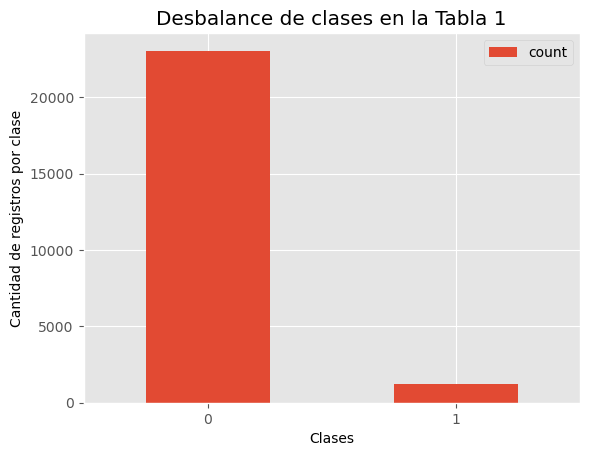

In [1532]:
df_well_1['payflag'].value_counts().plot.bar(rot= 0) 
plt.title('Desbalance de clases en la Tabla 1')
plt.ylabel('Cantidad de registros por clase')
plt.xlabel('Clases')
plt.legend(loc='upper right')
plt.savefig("Chart_unbalance_data_Pozo-1.png", dpi=600, bbox_inches='tight', pad_inches=0.5)

In [1538]:
# Contabilizando los registros por cada clase para constatar el desbalance en Pozo 2

df_well_2.shape

(12255, 20)

In [1539]:
df_well_2['payflag'].value_counts()

payflag
0    11591
1      664
Name: count, dtype: int64

In [1534]:
df_well_2['payflag'].unique()

array([0, 1], dtype=int64)

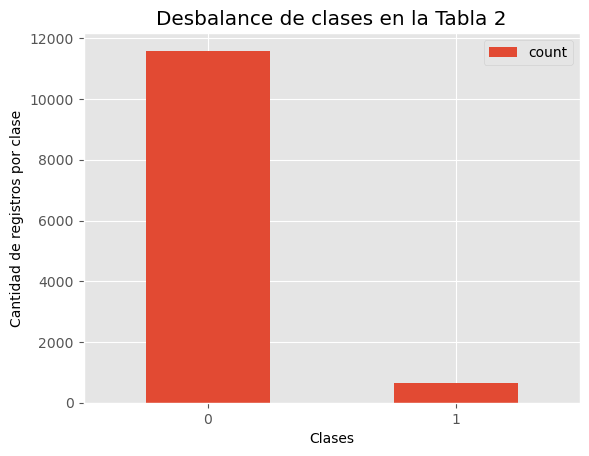

In [1535]:
df_well_2['payflag'].value_counts().plot.bar(rot= 0) 
plt.title('Desbalance de clases en la Tabla 2')
plt.ylabel('Cantidad de registros por clase')
plt.xlabel('Clases')
plt.legend(loc='upper right')
plt.savefig("Chart_unbalance_data_Pozo-2.png", dpi=600, bbox_inches='tight', pad_inches=0.5)

Como se puede apreciar en los gráficos anteriores se aprecia la marcada diferencia en la cantidad de registros de cada clase  clases en cada uno de los pozos, totalizando en clase 0 el 94.9 % y el 94.4 % de los registros en el pozo 1 y en el pozo 2, respectivamente.

In [1540]:
# Se aplica el método Oversampling
# A partir de la situación anterior se aplica un técnica para balancear los datos para poder aplicar luego un algoritmo 
# regresión

